# Crime analysis in python


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
sf_data=pd.read_csv('sanfrancisco_incidents_summer_2014.csv',
                    parse_dates=['Date','Time'],
                   infer_datetime_format=True)
seattle_data=pd.read_csv('seattle_incidents_summer_2014.csv',
                         parse_dates=['Date Reported',
                                      'Occurred Date or Date Range Start',
                                      'Occurred Date Range End'],
                        infer_datetime_format=True)

we want to remove records that were included in the Seattle Data which were outside the summer of 2014(06/01/2014--08/31/2014)

#first deal with seattle dataset

In [57]:
seattle_data = seattle_data[seattle_data['Date Reported'] <= '2014-08-31']

In [176]:
sf_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Day,Year,Month,Hour,Week,FullDayOfWeek
0,140734311,ARSON,ARSON OF A VEHICLE,6,2014-08-31,2017-08-22 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,31,2014,8,23,35,Sunday
1,140736317,NON-CRIMINAL,LOST PROPERTY,6,2014-08-31,2017-08-22 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,31,2014,8,23,35,Sunday
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-22 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,31,2014,8,23,35,Sunday
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-22 23:30:00,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,31,2014,8,23,35,Sunday
4,140734220,NON-CRIMINAL,FOUND PROPERTY,6,2014-08-31,2017-08-22 23:23:00,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000,31,2014,8,23,35,Sunday


In [58]:
seattle_data['Time'] = seattle_data['Date Reported'].dt.time



In [59]:
seattle_data['Time']

1189     23:54:00
1190     23:54:00
1191     23:46:00
1192     23:46:00
1193     23:39:00
1194     23:39:00
1195     23:35:00
1196     23:35:00
1197     23:20:00
1198     23:20:00
1199     23:11:00
1200     23:03:00
1201     22:53:00
1202     22:53:00
1203     22:50:00
1204     22:50:00
1205     22:47:00
1206     22:47:00
1207     22:33:00
1208     22:33:00
1209     22:25:00
1210     22:25:00
1211     22:01:00
1212     22:01:00
1213     21:59:00
1214     21:59:00
1215     21:48:00
1216     21:48:00
1217     21:48:00
1218     21:48:00
           ...   
32749    02:31:00
32750    02:31:00
32751    02:18:00
32752    02:18:00
32753    02:04:00
32754    02:04:00
32755    02:04:00
32756    02:04:00
32757    02:03:00
32758    02:03:00
32759    02:00:00
32760    02:00:00
32761    01:20:00
32762    01:20:00
32763    01:19:00
32764    01:19:00
32765    01:18:00
32766    01:18:00
32767    00:45:00
32768    00:45:00
32769    00:42:00
32770    00:42:00
32771    00:39:00
32772    00:39:00
32773    0

In [13]:
seattle_data['Date Reported']

1189    2014-08-30 23:54:00
1190    2014-08-30 23:54:00
1191    2014-08-30 23:46:00
1192    2014-08-30 23:46:00
1193    2014-08-30 23:39:00
1194    2014-08-30 23:39:00
1195    2014-08-30 23:35:00
1196    2014-08-30 23:35:00
1197    2014-08-30 23:20:00
1198    2014-08-30 23:20:00
1199    2014-08-30 23:11:00
1200    2014-08-30 23:03:00
1201    2014-08-30 22:53:00
1202    2014-08-30 22:53:00
1203    2014-08-30 22:50:00
1204    2014-08-30 22:50:00
1205    2014-08-30 22:47:00
1206    2014-08-30 22:47:00
1207    2014-08-30 22:33:00
1208    2014-08-30 22:33:00
1209    2014-08-30 22:25:00
1210    2014-08-30 22:25:00
1211    2014-08-30 22:01:00
1212    2014-08-30 22:01:00
1213    2014-08-30 21:59:00
1214    2014-08-30 21:59:00
1215    2014-08-30 21:48:00
1216    2014-08-30 21:48:00
1217    2014-08-30 21:48:00
1218    2014-08-30 21:48:00
                ...        
32749   2014-06-01 02:31:00
32750   2014-06-01 02:31:00
32751   2014-06-01 02:18:00
32752   2014-06-01 02:18:00
32753   2014-06-01 0

In [67]:
seattle_data['Day'] = seattle_data['Date Reported'].dt.day.astype('category')

In [61]:
seattle_data['Day']

1189     30
1190     30
1191     30
1192     30
1193     30
1194     30
1195     30
1196     30
1197     30
1198     30
1199     30
1200     30
1201     30
1202     30
1203     30
1204     30
1205     30
1206     30
1207     30
1208     30
1209     30
1210     30
1211     30
1212     30
1213     30
1214     30
1215     30
1216     30
1217     30
1218     30
         ..
32749     1
32750     1
32751     1
32752     1
32753     1
32754     1
32755     1
32756     1
32757     1
32758     1
32759     1
32760     1
32761     1
32762     1
32763     1
32764     1
32765     1
32766     1
32767     1
32768     1
32769     1
32770     1
32771     1
32772     1
32773     1
32774     1
32775     1
32776     1
32777     1
32778     1
Name: Day, Length: 31590, dtype: category
Categories (31, int64): [1, 2, 3, 4, ..., 28, 29, 30, 31]

In [68]:
seattle_data['Year'] = seattle_data['Date Reported'].dt.year.astype('category')

In [62]:
seattle_data['Year']

1189     2014
1190     2014
1191     2014
1192     2014
1193     2014
1194     2014
1195     2014
1196     2014
1197     2014
1198     2014
1199     2014
1200     2014
1201     2014
1202     2014
1203     2014
1204     2014
1205     2014
1206     2014
1207     2014
1208     2014
1209     2014
1210     2014
1211     2014
1212     2014
1213     2014
1214     2014
1215     2014
1216     2014
1217     2014
1218     2014
         ... 
32749    2014
32750    2014
32751    2014
32752    2014
32753    2014
32754    2014
32755    2014
32756    2014
32757    2014
32758    2014
32759    2014
32760    2014
32761    2014
32762    2014
32763    2014
32764    2014
32765    2014
32766    2014
32767    2014
32768    2014
32769    2014
32770    2014
32771    2014
32772    2014
32773    2014
32774    2014
32775    2014
32776    2014
32777    2014
32778    2014
Name: Year, Length: 31590, dtype: int64

In [69]:
seattle_data['Month'] = seattle_data['Date Reported'].dt.month.astype('category')

In [64]:
seattle_data['Month']

1189     8
1190     8
1191     8
1192     8
1193     8
1194     8
1195     8
1196     8
1197     8
1198     8
1199     8
1200     8
1201     8
1202     8
1203     8
1204     8
1205     8
1206     8
1207     8
1208     8
1209     8
1210     8
1211     8
1212     8
1213     8
1214     8
1215     8
1216     8
1217     8
1218     8
        ..
32749    6
32750    6
32751    6
32752    6
32753    6
32754    6
32755    6
32756    6
32757    6
32758    6
32759    6
32760    6
32761    6
32762    6
32763    6
32764    6
32765    6
32766    6
32767    6
32768    6
32769    6
32770    6
32771    6
32772    6
32773    6
32774    6
32775    6
32776    6
32777    6
32778    6
Name: Month, Length: 31590, dtype: category
Categories (3, int64): [6, 7, 8]

In [70]:
seattle_data['DayOfWeek'] = seattle_data['Date Reported'].dt.dayofweek.astype('category')

In [21]:
seattle_data['DayOfWeek']

1189     5
1190     5
1191     5
1192     5
1193     5
1194     5
1195     5
1196     5
1197     5
1198     5
1199     5
1200     5
1201     5
1202     5
1203     5
1204     5
1205     5
1206     5
1207     5
1208     5
1209     5
1210     5
1211     5
1212     5
1213     5
1214     5
1215     5
1216     5
1217     5
1218     5
        ..
32749    6
32750    6
32751    6
32752    6
32753    6
32754    6
32755    6
32756    6
32757    6
32758    6
32759    6
32760    6
32761    6
32762    6
32763    6
32764    6
32765    6
32766    6
32767    6
32768    6
32769    6
32770    6
32771    6
32772    6
32773    6
32774    6
32775    6
32776    6
32777    6
32778    6
Name: DayOfWeek, Length: 31590, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [71]:
seattle_data['Date'] = seattle_data['Date Reported'].dt.date

In [23]:
seattle_data['Date']

1189     2014-08-30
1190     2014-08-30
1191     2014-08-30
1192     2014-08-30
1193     2014-08-30
1194     2014-08-30
1195     2014-08-30
1196     2014-08-30
1197     2014-08-30
1198     2014-08-30
1199     2014-08-30
1200     2014-08-30
1201     2014-08-30
1202     2014-08-30
1203     2014-08-30
1204     2014-08-30
1205     2014-08-30
1206     2014-08-30
1207     2014-08-30
1208     2014-08-30
1209     2014-08-30
1210     2014-08-30
1211     2014-08-30
1212     2014-08-30
1213     2014-08-30
1214     2014-08-30
1215     2014-08-30
1216     2014-08-30
1217     2014-08-30
1218     2014-08-30
            ...    
32749    2014-06-01
32750    2014-06-01
32751    2014-06-01
32752    2014-06-01
32753    2014-06-01
32754    2014-06-01
32755    2014-06-01
32756    2014-06-01
32757    2014-06-01
32758    2014-06-01
32759    2014-06-01
32760    2014-06-01
32761    2014-06-01
32762    2014-06-01
32763    2014-06-01
32764    2014-06-01
32765    2014-06-01
32766    2014-06-01
32767    2014-06-01


In [72]:
seattle_data['Hour'] = seattle_data['Date Reported'].dt.hour.astype('category')

In [25]:
seattle_data['Hour']

1189     23
1190     23
1191     23
1192     23
1193     23
1194     23
1195     23
1196     23
1197     23
1198     23
1199     23
1200     23
1201     22
1202     22
1203     22
1204     22
1205     22
1206     22
1207     22
1208     22
1209     22
1210     22
1211     22
1212     22
1213     21
1214     21
1215     21
1216     21
1217     21
1218     21
         ..
32749     2
32750     2
32751     2
32752     2
32753     2
32754     2
32755     2
32756     2
32757     2
32758     2
32759     2
32760     2
32761     1
32762     1
32763     1
32764     1
32765     1
32766     1
32767     0
32768     0
32769     0
32770     0
32771     0
32772     0
32773     0
32774     0
32775     0
32776     0
32777     0
32778     0
Name: Hour, Length: 31590, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [73]:
seattle_data['Week'] = seattle_data['Date Reported'].dt.weekofyear.astype('category')

In [27]:
seattle_data['Week']

1189     35
1190     35
1191     35
1192     35
1193     35
1194     35
1195     35
1196     35
1197     35
1198     35
1199     35
1200     35
1201     35
1202     35
1203     35
1204     35
1205     35
1206     35
1207     35
1208     35
1209     35
1210     35
1211     35
1212     35
1213     35
1214     35
1215     35
1216     35
1217     35
1218     35
         ..
32749    22
32750    22
32751    22
32752    22
32753    22
32754    22
32755    22
32756    22
32757    22
32758    22
32759    22
32760    22
32761    22
32762    22
32763    22
32764    22
32765    22
32766    22
32767    22
32768    22
32769    22
32770    22
32771    22
32772    22
32773    22
32774    22
32775    22
32776    22
32777    22
32778    22
Name: Week, Length: 31590, dtype: category
Categories (14, int64): [22, 23, 24, 25, ..., 32, 33, 34, 35]

In [373]:
day_names = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
             4:'Friday', 5:'Saturday', 6:'Sunday'}

In [374]:
month_names={6:'June',7:'July',8:'August'}

In [75]:
seattle_data['FullDayOfWeek'] = seattle_data['DayOfWeek'].apply(lambda x: day_names[x])

In [30]:
seattle_data['FullDayOfWeek']

1189     Saturday
1190     Saturday
1191     Saturday
1192     Saturday
1193     Saturday
1194     Saturday
1195     Saturday
1196     Saturday
1197     Saturday
1198     Saturday
1199     Saturday
1200     Saturday
1201     Saturday
1202     Saturday
1203     Saturday
1204     Saturday
1205     Saturday
1206     Saturday
1207     Saturday
1208     Saturday
1209     Saturday
1210     Saturday
1211     Saturday
1212     Saturday
1213     Saturday
1214     Saturday
1215     Saturday
1216     Saturday
1217     Saturday
1218     Saturday
           ...   
32749      Sunday
32750      Sunday
32751      Sunday
32752      Sunday
32753      Sunday
32754      Sunday
32755      Sunday
32756      Sunday
32757      Sunday
32758      Sunday
32759      Sunday
32760      Sunday
32761      Sunday
32762      Sunday
32763      Sunday
32764      Sunday
32765      Sunday
32766      Sunday
32767      Sunday
32768      Sunday
32769      Sunday
32770      Sunday
32771      Sunday
32772      Sunday
32773     

In [76]:
seattle_data['FullDayOfWeek'] = seattle_data['FullDayOfWeek'].astype('category')

In [32]:
seattle_data['FullDayOfWeek']

1189     Saturday
1190     Saturday
1191     Saturday
1192     Saturday
1193     Saturday
1194     Saturday
1195     Saturday
1196     Saturday
1197     Saturday
1198     Saturday
1199     Saturday
1200     Saturday
1201     Saturday
1202     Saturday
1203     Saturday
1204     Saturday
1205     Saturday
1206     Saturday
1207     Saturday
1208     Saturday
1209     Saturday
1210     Saturday
1211     Saturday
1212     Saturday
1213     Saturday
1214     Saturday
1215     Saturday
1216     Saturday
1217     Saturday
1218     Saturday
           ...   
32749      Sunday
32750      Sunday
32751      Sunday
32752      Sunday
32753      Sunday
32754      Sunday
32755      Sunday
32756      Sunday
32757      Sunday
32758      Sunday
32759      Sunday
32760      Sunday
32761      Sunday
32762      Sunday
32763      Sunday
32764      Sunday
32765      Sunday
32766      Sunday
32767      Sunday
32768      Sunday
32769      Sunday
32770      Sunday
32771      Sunday
32772      Sunday
32773     

#Rename a column

In [77]:
seattle_data = seattle_data.rename(columns={'Summarized Offense Description': 'Category'})

#next, the SF dataset

In [78]:
sf_data['Day'] = sf_data['Date'].dt.day.astype('category')

In [36]:
sf_data['Day']

0        31
1        31
2        31
3        31
4        31
5        31
6        31
7        31
8        31
9        31
10       31
11       31
12       31
13       31
14       31
15       31
16       31
17       31
18       31
19       31
20       31
21       31
22       31
23       31
24       31
25       31
26       31
27       31
28       31
29       31
         ..
28963     1
28964     1
28965     1
28966     1
28967     1
28968     1
28969     1
28970     1
28971     1
28972     1
28973     1
28974     1
28975     1
28976     1
28977     1
28978     1
28979     1
28980     1
28981     1
28982     1
28983     1
28984     1
28985     1
28986     1
28987     1
28988     1
28989     1
28990     1
28991     1
28992     1
Name: Day, Length: 28993, dtype: category
Categories (31, int64): [1, 2, 3, 4, ..., 28, 29, 30, 31]

In [79]:
sf_data['Year'] = sf_data['Date'].dt.year.astype('category')

In [38]:
sf_data['Year'] 

0        2014
1        2014
2        2014
3        2014
4        2014
5        2014
6        2014
7        2014
8        2014
9        2014
10       2014
11       2014
12       2014
13       2014
14       2014
15       2014
16       2014
17       2014
18       2014
19       2014
20       2014
21       2014
22       2014
23       2014
24       2014
25       2014
26       2014
27       2014
28       2014
29       2014
         ... 
28963    2014
28964    2014
28965    2014
28966    2014
28967    2014
28968    2014
28969    2014
28970    2014
28971    2014
28972    2014
28973    2014
28974    2014
28975    2014
28976    2014
28977    2014
28978    2014
28979    2014
28980    2014
28981    2014
28982    2014
28983    2014
28984    2014
28985    2014
28986    2014
28987    2014
28988    2014
28989    2014
28990    2014
28991    2014
28992    2014
Name: Year, Length: 28993, dtype: category
Categories (1, int64): [2014]

In [80]:
sf_data['Month'] = sf_data['Date'].dt.month.astype('category')

In [81]:
sf_data['DayOfWeek'] = sf_data['Date'].dt.dayofweek.astype('category')

In [41]:
#sf_data['Date'] = sf_data['Date'].dt.date

In [82]:
sf_data['Date']

0       2014-08-31
1       2014-08-31
2       2014-08-31
3       2014-08-31
4       2014-08-31
5       2014-08-31
6       2014-08-31
7       2014-08-31
8       2014-08-31
9       2014-08-31
10      2014-08-31
11      2014-08-31
12      2014-08-31
13      2014-08-31
14      2014-08-31
15      2014-08-31
16      2014-08-31
17      2014-08-31
18      2014-08-31
19      2014-08-31
20      2014-08-31
21      2014-08-31
22      2014-08-31
23      2014-08-31
24      2014-08-31
25      2014-08-31
26      2014-08-31
27      2014-08-31
28      2014-08-31
29      2014-08-31
           ...    
28963   2014-06-01
28964   2014-06-01
28965   2014-06-01
28966   2014-06-01
28967   2014-06-01
28968   2014-06-01
28969   2014-06-01
28970   2014-06-01
28971   2014-06-01
28972   2014-06-01
28973   2014-06-01
28974   2014-06-01
28975   2014-06-01
28976   2014-06-01
28977   2014-06-01
28978   2014-06-01
28979   2014-06-01
28980   2014-06-01
28981   2014-06-01
28982   2014-06-01
28983   2014-06-01
28984   2014

In [83]:
sf_data['DayOfWeek']

0        6
1        6
2        6
3        6
4        6
5        6
6        6
7        6
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
17       6
18       6
19       6
20       6
21       6
22       6
23       6
24       6
25       6
26       6
27       6
28       6
29       6
        ..
28963    6
28964    6
28965    6
28966    6
28967    6
28968    6
28969    6
28970    6
28971    6
28972    6
28973    6
28974    6
28975    6
28976    6
28977    6
28978    6
28979    6
28980    6
28981    6
28982    6
28983    6
28984    6
28985    6
28986    6
28987    6
28988    6
28989    6
28990    6
28991    6
28992    6
Name: DayOfWeek, Length: 28993, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [84]:
sf_data['Hour'] = sf_data['Time'].dt.hour.astype('category')

In [45]:
sf_data['Hour']

0        23
1        23
2        23
3        23
4        23
5        23
6        23
7        23
8        23
9        23
10       23
11       23
12       23
13       23
14       23
15       22
16       22
17       22
18       22
19       22
20       22
21       22
22       22
23       22
24       22
25       22
26       22
27       22
28       22
29       22
         ..
28963     1
28964     1
28965     0
28966     0
28967     0
28968     0
28969     0
28970     0
28971     0
28972     0
28973     0
28974     0
28975     0
28976     0
28977     0
28978     0
28979     0
28980     0
28981     0
28982     0
28983     0
28984     0
28985     0
28986     0
28987     0
28988     0
28989     0
28990     0
28991     0
28992     0
Name: Hour, Length: 28993, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [88]:
sf_data['Week'] = sf_data['Date'].dt.weekofyear.astype('category')

In [89]:
sf_data['Week']

0        35
1        35
2        35
3        35
4        35
5        35
6        35
7        35
8        35
9        35
10       35
11       35
12       35
13       35
14       35
15       35
16       35
17       35
18       35
19       35
20       35
21       35
22       35
23       35
24       35
25       35
26       35
27       35
28       35
29       35
         ..
28963    22
28964    22
28965    22
28966    22
28967    22
28968    22
28969    22
28970    22
28971    22
28972    22
28973    22
28974    22
28975    22
28976    22
28977    22
28978    22
28979    22
28980    22
28981    22
28982    22
28983    22
28984    22
28985    22
28986    22
28987    22
28988    22
28989    22
28990    22
28991    22
28992    22
Name: Week, Length: 28993, dtype: category
Categories (14, int64): [22, 23, 24, 25, ..., 32, 33, 34, 35]

In [91]:
sf_data['FullDayOfWeek'] = sf_data['DayOfWeek'].apply(lambda x: day_names[x])

In [92]:
sf_data['FullDayOfWeek'] 

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
5        Sunday
6        Sunday
7        Sunday
8        Sunday
9        Sunday
10       Sunday
11       Sunday
12       Sunday
13       Sunday
14       Sunday
15       Sunday
16       Sunday
17       Sunday
18       Sunday
19       Sunday
20       Sunday
21       Sunday
22       Sunday
23       Sunday
24       Sunday
25       Sunday
26       Sunday
27       Sunday
28       Sunday
29       Sunday
          ...  
28963    Sunday
28964    Sunday
28965    Sunday
28966    Sunday
28967    Sunday
28968    Sunday
28969    Sunday
28970    Sunday
28971    Sunday
28972    Sunday
28973    Sunday
28974    Sunday
28975    Sunday
28976    Sunday
28977    Sunday
28978    Sunday
28979    Sunday
28980    Sunday
28981    Sunday
28982    Sunday
28983    Sunday
28984    Sunday
28985    Sunday
28986    Sunday
28987    Sunday
28988    Sunday
28989    Sunday
28990    Sunday
28991    Sunday
28992    Sunday
Name: FullDayOfWeek, Len

In [93]:
sf_data['FullDayOfWeek'] = sf_data['FullDayOfWeek'].astype('category')

In [94]:
sf_data['FullDayOfWeek']

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
5        Sunday
6        Sunday
7        Sunday
8        Sunday
9        Sunday
10       Sunday
11       Sunday
12       Sunday
13       Sunday
14       Sunday
15       Sunday
16       Sunday
17       Sunday
18       Sunday
19       Sunday
20       Sunday
21       Sunday
22       Sunday
23       Sunday
24       Sunday
25       Sunday
26       Sunday
27       Sunday
28       Sunday
29       Sunday
          ...  
28963    Sunday
28964    Sunday
28965    Sunday
28966    Sunday
28967    Sunday
28968    Sunday
28969    Sunday
28970    Sunday
28971    Sunday
28972    Sunday
28973    Sunday
28974    Sunday
28975    Sunday
28976    Sunday
28977    Sunday
28978    Sunday
28979    Sunday
28980    Sunday
28981    Sunday
28982    Sunday
28983    Sunday
28984    Sunday
28985    Sunday
28986    Sunday
28987    Sunday
28988    Sunday
28989    Sunday
28990    Sunday
28991    Sunday
28992    Sunday
Name: FullDayOfWeek, Len

# Define plotting functions

In [99]:
subset_data=sf_data[sf_data['Category']=='BURGLARY']

In [100]:
subset_data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Day,Year,Month,Hour,Week,FullDayOfWeek
1535,140722300,BURGLARY,SAFE BURGLARY OF A RESIDENCE,2,2014-08-27,2017-08-22 08:00:00,MISSION,NONE,300 Block of SHOTWELL ST,-122.416082,37.762823,"(37.7628232674387, -122.416082198307)",14072230005241,27,2014,8,8,35,Wednesday
2386,140714539,BURGLARY,SAFE BURGLARY,6,2014-08-24,2017-08-22 13:30:00,NORTHERN,NONE,1100 Block of GOUGH ST,-122.424561,37.784368,"(37.7843677003184, -122.4245611166)",14071453905271,24,2014,8,13,34,Sunday
4104,140696896,BURGLARY,SAFE BURGLARY OF A RESIDENCE,1,2014-08-19,2017-08-22 10:30:00,MISSION,NONE,300 Block of CLIPPER ST,-122.432761,37.748906,"(37.7489060579989, -122.432761361114)",14069689605241,19,2014,8,10,34,Tuesday
8620,140652735,BURGLARY,SAFE BURGLARY OF A STORE,2,2014-08-06,2017-08-22 03:03:00,TARAVAL,NONE,1000 Block of TARAVAL ST,-122.477315,37.743033,"(37.7430334964477, -122.477314517687)",14065273505251,6,2014,8,3,32,Wednesday
27715,140467681,BURGLARY,SAFE BURGLARY,3,2014-06-05,2017-08-22 03:16:00,TARAVAL,NONE,1700 Block of NORIEGA ST,-122.482380,37.754035,"(37.7540351278335, -122.482379669797)",14046768105271,5,2014,6,3,23,Thursday
28102,140464336,BURGLARY,SAFE BURGLARY,2,2014-06-04,2017-08-22 01:30:00,TENDERLOIN,NONE,0 Block of MASON ST,-122.409130,37.783807,"(37.7838066631424, -122.409129633669)",14046433605271,4,2014,6,1,23,Wednesday


In [110]:
def count_null(df):
    missing_count={}
    for col in df.columns:
        missing_count[col]=len(df[df[col].isnull()])
    return missing_count

In [111]:
count_null(seattle_data)

{'Category': 0,
 'Census Tract 2000': 120,
 'Date': 0,
 'Date Reported': 0,
 'Day': 0,
 'DayOfWeek': 0,
 'District/Sector': 46,
 'FullDayOfWeek': 0,
 'General Offense Number': 0,
 'Hour': 0,
 'Hundred Block Location': 0,
 'Latitude': 0,
 'Location': 0,
 'Longitude': 0,
 'Month': 0,
 'Occurred Date Range End': 15936,
 'Occurred Date or Date Range Start': 0,
 'Offense Code': 0,
 'Offense Code Extension': 0,
 'Offense Type': 0,
 'RMS CDW ID': 0,
 'Summary Offense Code': 0,
 'Time': 0,
 'Week': 0,
 'Year': 0,
 'Zone/Beat': 45}

In [112]:
count_null(sf_data)

{'Address': 0,
 'Category': 0,
 'Date': 0,
 'Day': 0,
 'DayOfWeek': 0,
 'Descript': 0,
 'FullDayOfWeek': 0,
 'Hour': 0,
 'IncidntNum': 0,
 'Location': 0,
 'Month': 0,
 'PdDistrict': 0,
 'PdId': 0,
 'Resolution': 0,
 'Time': 0,
 'Week': 0,
 'X': 0,
 'Y': 0,
 'Year': 0}

In [119]:
by_month = sf_data.pivot_table('IncidntNum', aggfunc='count',
                            columns='Month')
by_month

Month,6,7,8
IncidntNum,9114,9671,10208


In [760]:
by_weekday=sf_data.pivot_table('IncidntNum', aggfunc='count',
                            columns='FullDayOfWeek')
by_weekday

FullDayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
IncidntNum,4005,3930,4102,3968,4451,4319,4218


In [125]:
by_hour=sf_data.pivot_table('IncidntNum', aggfunc='count',
                            columns='Hour')
by_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
IncidntNum,1381,821,654,413,245,292,386,610,944,1074,...,1424,1614,1718,1952,1959,1744,1674,1482,1573,1378


In [126]:
by_week=sf_data.pivot_table('IncidntNum', aggfunc='count',
                            columns='Week')
by_week

Week,22,23,24,25,26,27,28,29,30,31,32,33,34,35
IncidntNum,284,2153,1964,2090,2342,2064,2154,2139,2305,2291,2396,2304,2276,2231


In [122]:
by_month2 = seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            columns='Month')
by_month2

Month,6,7,8
General Offense Number,10433,11013,10144


In [127]:
by_hour2=seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            columns='Hour')
by_hour2


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
General Offense Number,869,695,661,438,425,419,554,1071,1511,1669,...,1842,1817,1770,1915,1687,1508,1506,1569,1309,1033


In [129]:
by_week2=seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            columns='Week')
by_week2

Week,22,23,24,25,26,27,28,29,30,31,32,33,34,35
General Offense Number,217,2342,2405,2367,2667,2144,2435,2651,2607,2558,2397,2327,2352,2121


In [130]:
by_weekday2=seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            columns='FullDayOfWeek')
by_weekday2

FullDayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
General Offense Number,5183,4787,4566,4688,4333,4170,3863


We can consider plotting the above tables.

# SF crime rate and frequency

In [131]:
crime_incident=sf_data['Category'].value_counts()

In [132]:
crime_incident

LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMENT                     10
STOLEN PROPERTY             

In [133]:
crime_incident[0:14].keys()

Index([u'LARCENY/THEFT', u'OTHER OFFENSES', u'NON-CRIMINAL', u'ASSAULT',
       u'VEHICLE THEFT', u'WARRANTS', u'DRUG/NARCOTIC', u'SUSPICIOUS OCC',
       u'MISSING PERSON', u'SECONDARY CODES', u'WEAPON LAWS', u'ROBBERY',
       u'TRESPASS', u'FRAUD'],
      dtype='object')

In [135]:
import numpy as np

In [136]:
y_pos = np.arange(len(crime_incident[0:14].keys()))

In [137]:
plt.figure(figsize=(10,8))

In [143]:
print('San Franciso Crimes Table \n')
print('Category\t\tNumber of Occurances')
print(crime_incident)

San Franciso Crimes Table 

Category		Number of Occurances
LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZ

In [150]:
map(lambda x: x.title(), crime_incident[0:14].keys())

['Larceny/Theft',
 'Other Offenses',
 'Non-Criminal',
 'Assault',
 'Vehicle Theft',
 'Warrants',
 'Drug/Narcotic',
 'Suspicious Occ',
 'Missing Person',
 'Secondary Codes',
 'Weapon Laws',
 'Robbery',
 'Trespass',
 'Fraud']

In [152]:
y_pos = np.arange(len(crime_incident[0:14].keys()))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

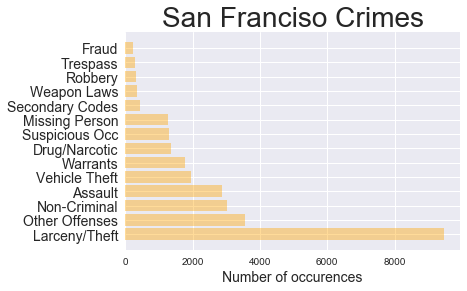

In [157]:
y_pos = np.arange(len(crime_incident[0:14].keys()))
plt.barh(y_pos, crime_incident[0:14].get_values(),align='center',alpha=0.4,color = 'orange')
plt.yticks(y_pos, map(lambda x: x.title(), crime_incident[0:14].keys()), fontsize= 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('San Franciso Crimes', fontsize =28)

# Seattle data frequency

In [158]:
crime_incident2=seattle_data['Category'].value_counts()

In [365]:
seattle_data['Category']

1189                     BURGLARY
1190                     BURGLARY
1191                     TRESPASS
1192                     TRESPASS
1193                    CAR PROWL
1194                    CAR PROWL
1195                  DISTURBANCE
1196                  DISTURBANCE
1197                      ROBBERY
1198                      ROBBERY
1199                      THREATS
1200                      ROBBERY
1201                    CAR PROWL
1202                    CAR PROWL
1203                  DISTURBANCE
1204                  DISTURBANCE
1205                    CAR PROWL
1206                    CAR PROWL
1207                  DISTURBANCE
1208                  DISTURBANCE
1209                   BIKE THEFT
1210                   BIKE THEFT
1211              PROPERTY DAMAGE
1212              PROPERTY DAMAGE
1213                    CAR PROWL
1214                    CAR PROWL
1215                      ASSAULT
1216                      ASSAULT
1217                      ASSAULT
1218          

In [159]:
crime_incident2

CAR PROWL                      6036
OTHER PROPERTY                 3482
BURGLARY                       3088
VEHICLE THEFT                  2997
PROPERTY DAMAGE                2310
ASSAULT                        1978
FRAUD                          1325
DISTURBANCE                    1309
THREATS                        1143
STOLEN PROPERTY                1103
WARRANT ARREST                 1009
SHOPLIFTING                     923
BIKE THEFT                      757
ROBBERY                         728
TRESPASS                        483
NARCOTICS                       388
BURGLARY-SECURE PARKING-RES     368
TRAFFIC                         250
MAIL THEFT                      236
PROSTITUTION                    200
DISPUTE                         167
COUNTERFEIT                     154
LOST PROPERTY                   146
PICKPOCKET                      144
WEAPON                          137
ANIMAL COMPLAINT                 96
THEFT OF SERVICES                94
VIOLATION OF COURT ORDER    

In [160]:
crime_incident2[0:14].keys()

Index([u'CAR PROWL', u'OTHER PROPERTY', u'BURGLARY', u'VEHICLE THEFT',
       u'PROPERTY DAMAGE', u'ASSAULT', u'FRAUD', u'DISTURBANCE', u'THREATS',
       u'STOLEN PROPERTY', u'WARRANT ARREST', u'SHOPLIFTING', u'BIKE THEFT',
       u'ROBBERY'],
      dtype='object')

In [161]:
y_pos2 = np.arange(len(crime_incident2[0:14].keys()))

In [162]:
print('Seattle Crimes Table \n')
print('Category\t\tNumber of Occurances')
print(crime_incident2)

Seattle Crimes Table 

Category		Number of Occurances
CAR PROWL                      6036
OTHER PROPERTY                 3482
BURGLARY                       3088
VEHICLE THEFT                  2997
PROPERTY DAMAGE                2310
ASSAULT                        1978
FRAUD                          1325
DISTURBANCE                    1309
THREATS                        1143
STOLEN PROPERTY                1103
WARRANT ARREST                 1009
SHOPLIFTING                     923
BIKE THEFT                      757
ROBBERY                         728
TRESPASS                        483
NARCOTICS                       388
BURGLARY-SECURE PARKING-RES     368
TRAFFIC                         250
MAIL THEFT                      236
PROSTITUTION                    200
DISPUTE                         167
COUNTERFEIT                     154
LOST PROPERTY                   146
PICKPOCKET                      144
WEAPON                          137
ANIMAL COMPLAINT                 96
THEFT OF S

In [364]:
 crime_incident2[0:14].keys()

Index([u'CAR PROWL', u'OTHER PROPERTY', u'BURGLARY', u'VEHICLE THEFT',
       u'PROPERTY DAMAGE', u'ASSAULT', u'FRAUD', u'DISTURBANCE', u'THREATS',
       u'STOLEN PROPERTY', u'WARRANT ARREST', u'SHOPLIFTING', u'BIKE THEFT',
       u'ROBBERY'],
      dtype='object')

In [164]:
map(lambda x: x.title(), crime_incident2[0:14].keys())

['Car Prowl',
 'Other Property',
 'Burglary',
 'Vehicle Theft',
 'Property Damage',
 'Assault',
 'Fraud',
 'Disturbance',
 'Threats',
 'Stolen Property',
 'Warrant Arrest',
 'Shoplifting',
 'Bike Theft',
 'Robbery']

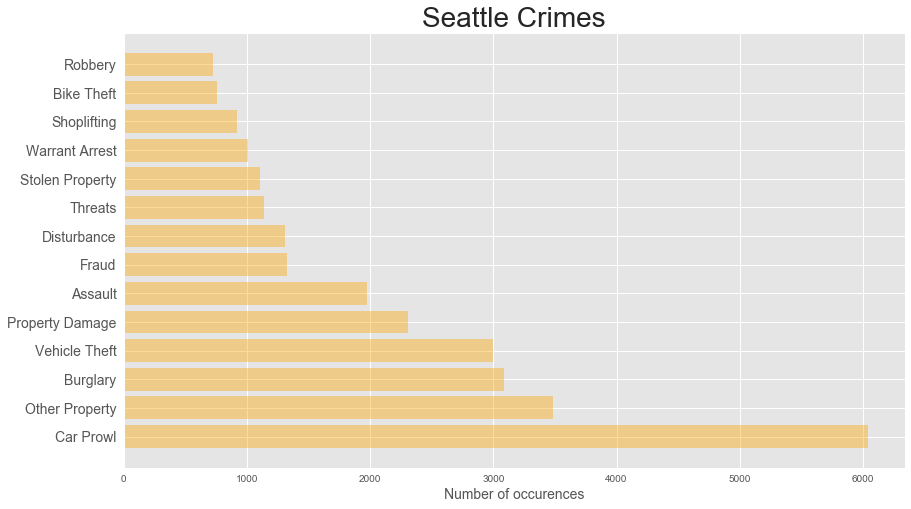

In [352]:
plt.barh(y_pos2, crime_incident2[0:14].get_values(),align='center',alpha=0.4,color = 'orange')
plt.yticks(y_pos2,map(lambda x:x.title(), crime_incident2[0:14].keys()),fontsize=14)
plt.xlabel('Number of occurences',fontsize=14)
plt.title('Seattle Crimes',fontsize=28)


# Crime by hours

In [166]:
import pylab

In [334]:
pylab.rcParams['figure.figsize'] = (14.0, 8.0)

In [340]:
sf_data_month=sf_data.groupby('Month').size()

In [357]:
sf_data_month.get_values()

array([ 9114,  9671, 10208])

In [347]:
import numpy as np

In [349]:
y_month=np.arange(len(sf_data_month.keys()))

In [366]:
sf_data_month.keys()

CategoricalIndex([6, 7, 8], categories=[6, 7, 8], ordered=False, name=u'Month', dtype='category')

In [371]:
sf_data_month_Lit=['June','July','August']

In [372]:
sf_data_month_Lit

['June', 'July', 'August']

In [ ]:
sf_data['FullDayOfWeek'] = sf_data['DayOfWeek'].apply(lambda x: day_names[x])

In [381]:
sf_data['FullMonth'] = sf_data['Month'].apply(lambda x: month_names[x])

In [382]:
sf_data['FullMonth']

0        August
1        August
2        August
3        August
4        August
5        August
6        August
7        August
8        August
9        August
10       August
11       August
12       August
13       August
14       August
15       August
16       August
17       August
18       August
19       August
20       August
21       August
22       August
23       August
24       August
25       August
26       August
27       August
28       August
29       August
          ...  
28963      June
28964      June
28965      June
28966      June
28967      June
28968      June
28969      June
28970      June
28971      June
28972      June
28973      June
28974      June
28975      June
28976      June
28977      June
28978      June
28979      June
28980      June
28981      June
28982      June
28983      June
28984      June
28985      June
28986      June
28987      June
28988      June
28989      June
28990      June
28991      June
28992      June
Name: FullMonth, Length:

In [383]:
sf_data_month=sf_data.groupby('FullMonth').size()

In [350]:
plt.figure(figsize=(10,8))

In [384]:
sf_data_month.keys()

CategoricalIndex([u'June', u'July', u'August'], categories=[u'June', u'July', u'August'], ordered=False, name=u'FullMonth', dtype='category')

In [385]:
sf_data_month.get_values()

array([ 9114,  9671, 10208])

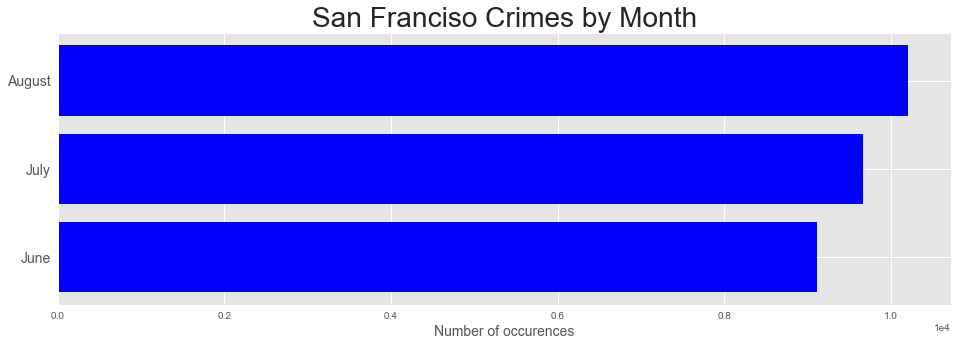

In [762]:
plt.barh(y_month, sf_data_month.get_values(),align='center',alpha=1,color = 'blue')


plt.yticks(y_month,map(lambda x:x, sf_data_month.keys()), fontsize=14)
#plt.yticks(y_month,sf_data_month_Lit, fontsize=14))
#plt.yticks(y_month,map(lambda x: x, sf_data_month_Lit),fontsize=14)

plt.xlabel('Number of occurences',fontsize=14)
plt.title('San Franciso Crimes by Month',fontsize=28)
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))


In [ ]:
plt.yticks(y_axis, map(lambda x: x.title(), crime_incident[0:14].keys()), fontsize= 14)

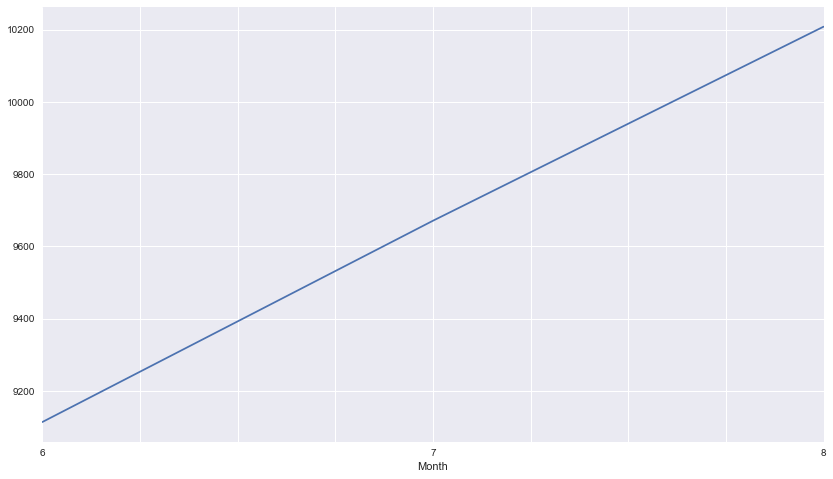

In [173]:
sf_data.groupby('Month').size().plot()


In [ ]:
daysOfWeekIdx = sf_data.groupby('DayOfWeek').size().keys()

In [178]:
larceny = sf_data[sf_data['Category'] == "LARCENY/THEFT"]

In [186]:
assault = sf_data[sf_data['Category'] == "ASSAULT"]

In [190]:
drug = sf_data[sf_data['Category'] == "DRUG/NARCOTIC"]

In [191]:
vehicle = sf_data[sf_data['Category'] == "VEHICLE THEFT"]

In [192]:
vandalism = sf_data[sf_data['Category'] == "VANDALISM"]

In [193]:
burglary = sf_data[sf_data['Category'] == "BURGLARY"]

In [323]:
xval=larceny.groupby('DayOfWeek').size().keys()

In [324]:
yval=larceny.groupby('DayOfWeek').size().get_values()

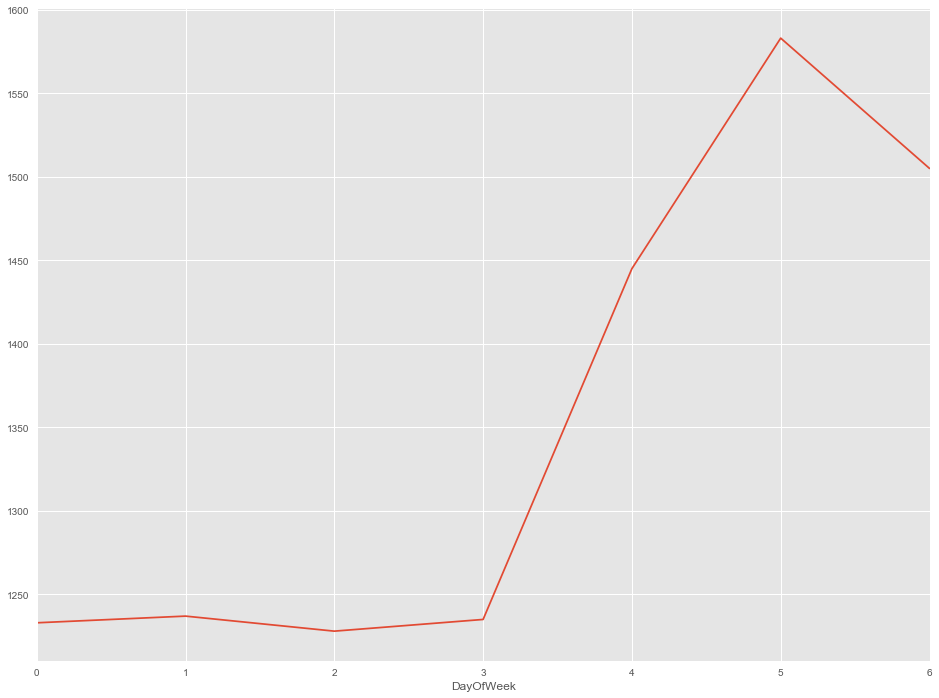

In [327]:
larceny.groupby('DayOfWeek').size().plot()

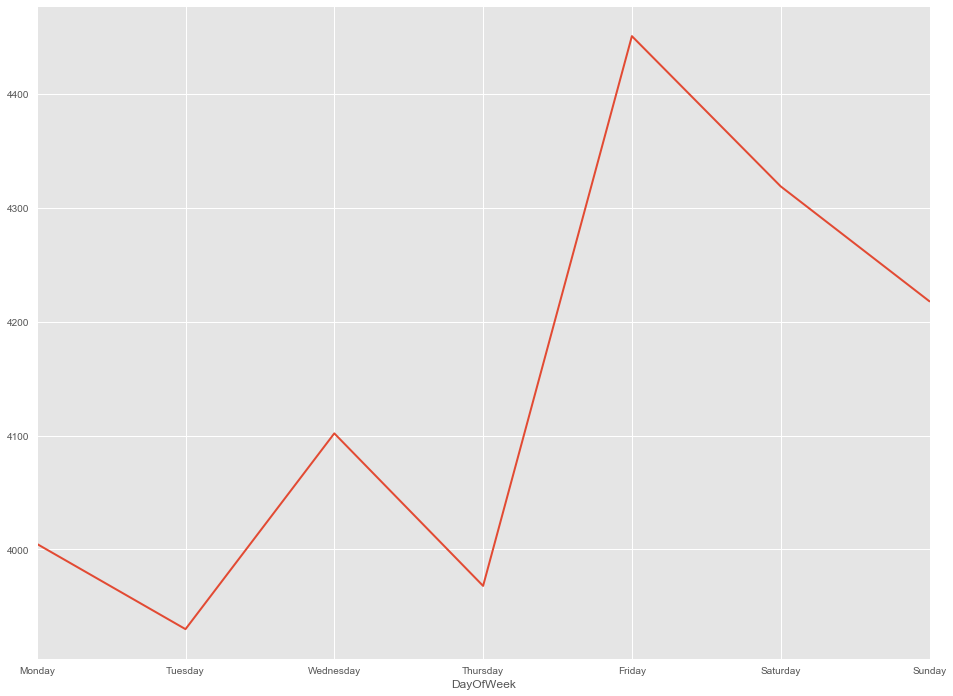

In [320]:
sf_data.groupby('DayOfWeek').size().plot(linewidth=2).set_xticklabels(daysOfWeekLit)


In [331]:
sf_data.groupby('Hour').size().get_values()

array([1381,  821,  654,  413,  245,  292,  386,  610,  944, 1074, 1206,
       1298, 1779, 1372, 1424, 1614, 1718, 1952, 1959, 1744, 1674, 1482,
       1573, 1378])

In [203]:
sf_data.groupby('Hour').size()

Hour
0     1381
1      821
2      654
3      413
4      245
5      292
6      386
7      610
8      944
9     1074
10    1206
11    1298
12    1779
13    1372
14    1424
15    1614
16    1718
17    1952
18    1959
19    1744
20    1674
21    1482
22    1573
23    1378
dtype: int64

In [204]:
sf_data.groupby('Hour').size().keys()

CategoricalIndex([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 categories=[0, 1, 2, 3, 4, 5, 6, 7, ...], ordered=False, name=u'Hour', dtype='category')

In [208]:
sf_data.groupby('Hour').size().get_values()

array([1381,  821,  654,  413,  245,  292,  386,  610,  944, 1074, 1206,
       1298, 1779, 1372, 1424, 1614, 1718, 1952, 1959, 1744, 1674, 1482,
       1573, 1378])

In [215]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

In [216]:
daysOfWeekIdx = sf_data.groupby('DayOfWeek').size().keys()

In [217]:
daysOfWeekIdx

CategoricalIndex([0, 1, 2, 3, 4, 5, 6], categories=[0, 1, 2, 3, 4, 5, 6], ordered=False, name=u'DayOfWeek', dtype='category')

In [218]:
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [219]:
daysOfWeekLit

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [222]:
occursByWeek = sf_data.groupby('DayOfWeek').size().get_values()

In [223]:
occursByWeek

array([4005, 3930, 4102, 3968, 4451, 4319, 4218])

In [224]:
sf_data.groupby('DayOfWeek').size()

DayOfWeek
0    4005
1    3930
2    4102
3    3968
4    4451
5    4319
6    4218
dtype: int64

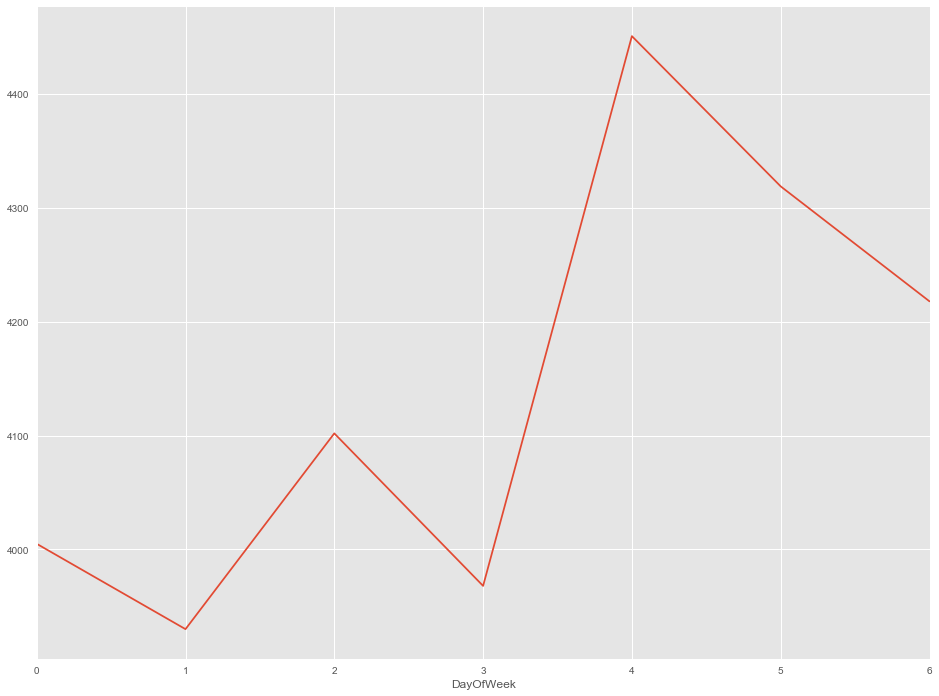

In [230]:
sf_data.groupby('DayOfWeek').size().plot()

In [235]:
y = np.empty([6,7])
h = [None]*6
width = 0.1

In [236]:
burglary['Month'].unique()

[8, 6]
Categories (2, int64): [8, 6]

In [237]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

plt.style.use('ggplot')

In [238]:
daysOfWeekIdx = sf_data.groupby('DayOfWeek').size().keys()

In [239]:
daysOfWeekIdx

CategoricalIndex([0, 1, 2, 3, 4, 5, 6], categories=[0, 1, 2, 3, 4, 5, 6], ordered=False, name=u'DayOfWeek', dtype='category')

In [304]:
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [241]:
daysOfWeekLit

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [242]:
occursByWeek = sf_data.groupby('DayOfWeek').size().get_values()


In [243]:
occursByWeek

array([4005, 3930, 4102, 3968, 4451, 4319, 4218])

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now we are still at SF data

In [300]:
def plot_by_hour(category, nrow, ncol):
    fig1 = plt.figure(figsize=(10, 10))
    for i in range(1, len(category)+1):
        ax = 'ax' + str(i)
        ax = fig1.add_subplot(nrow, ncol, i)
        ax.hist(sf_data.loc[sf_data['Category'] == category[i - 1], 'Hour'], bins=24) 
        ax.set_title(category[i - 1])
      
    plt.suptitle("by day of the week")
    plt.tight_layout()
    plt.show()  

In [309]:
def plot_by_day(category, nrow, ncol):
    fig1 = plt.figure(figsize=(10, 10))
    for i in range(1, len(category)+1):
        ax = 'ax' + str(i)
        ax = fig1.add_subplot(nrow, ncol, i) 
        ax.hist(sf_data.loc[sf_data['Category'] == otherCrimes[0], 'DayOfWeek'], bins=7) 
        
        
       # ax.get_xticklabels(daysOfWeekLit)
        ax.set_title(category[i - 1])

    plt.suptitle("by day of the week")
    plt.tight_layout()
    plt.show()

In [306]:
otherCrimes = ['WARRANTS', 'OTHER OFFENSES', 'WEAPON LAWS', 'SECONDARY CODES']

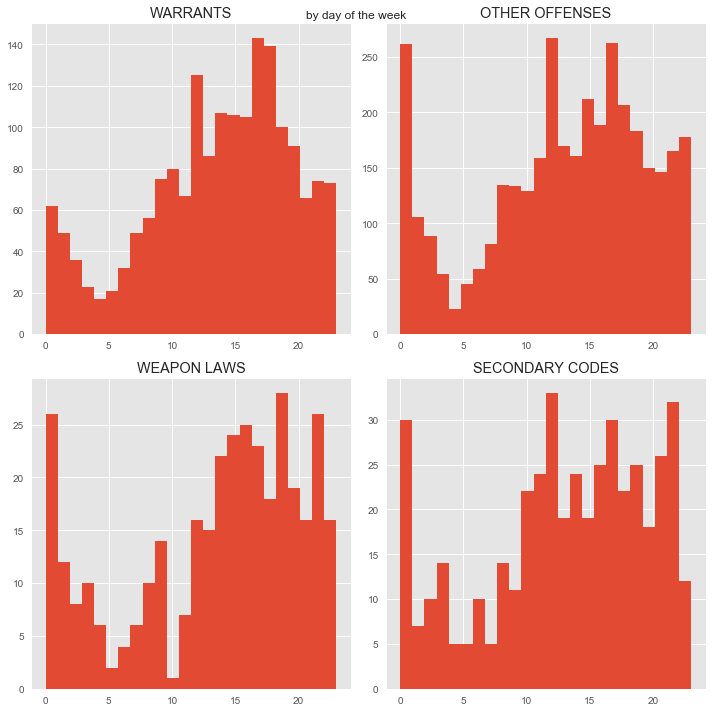

In [303]:
plot_by_hour(otherCrimes, 2, 2)

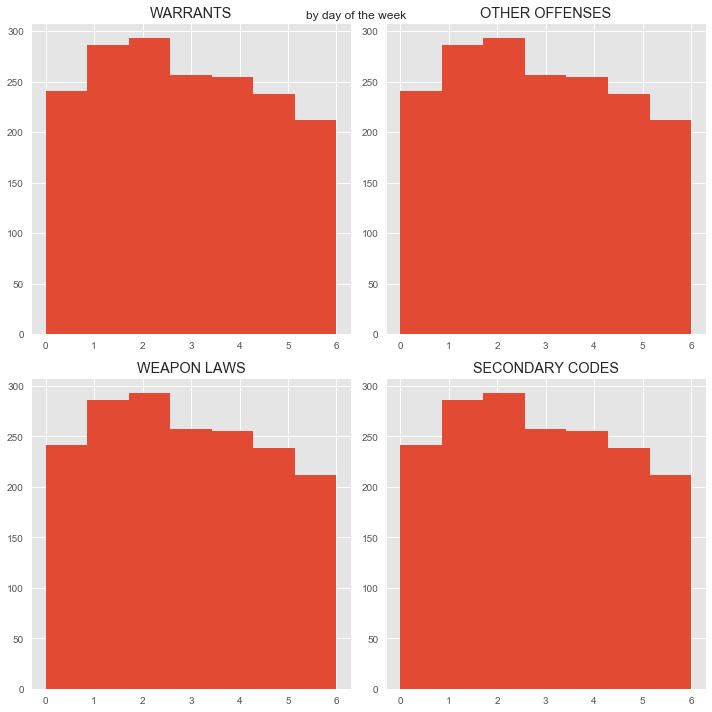

In [310]:
plot_by_day(otherCrimes, 2, 2)

In [279]:
familyCrimes = ['MISSING PERSON', 'RUNAWAY', 'FAMILY OFFENSES', 'SUICIDE']

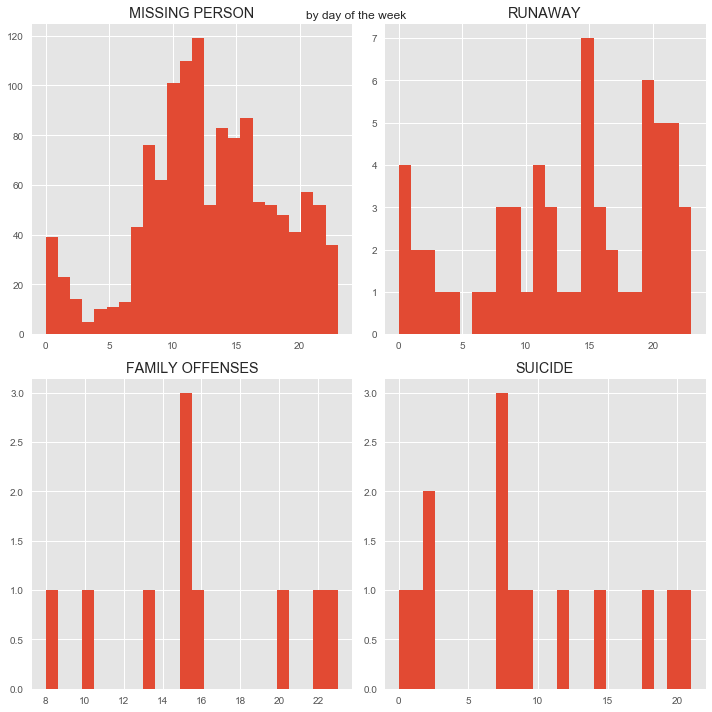

In [280]:
plot_by_hour(familyCrimes, 2, 2)

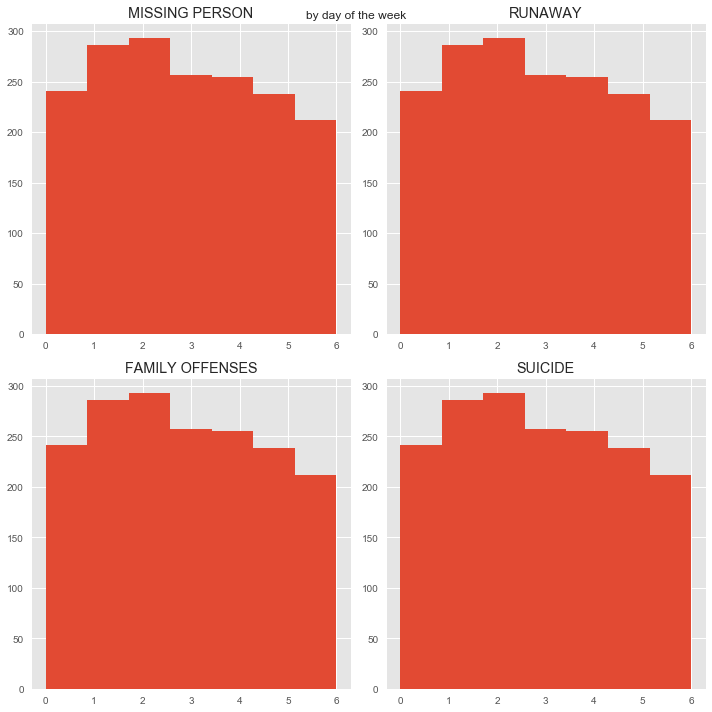

In [281]:
plot_by_day(familyCrimes, 2, 2)

In [282]:
violentCrimes = ['ASSAULT', 'SEX OFFENSES FORCIBLE', 'ARSON', 'KIDNAPPING']

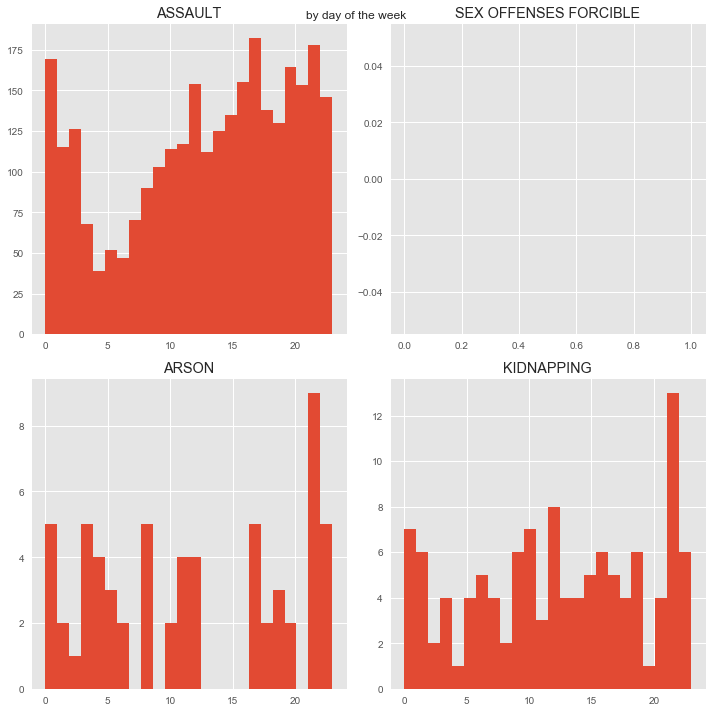

In [283]:
plot_by_hour(violentCrimes, 2, 2)

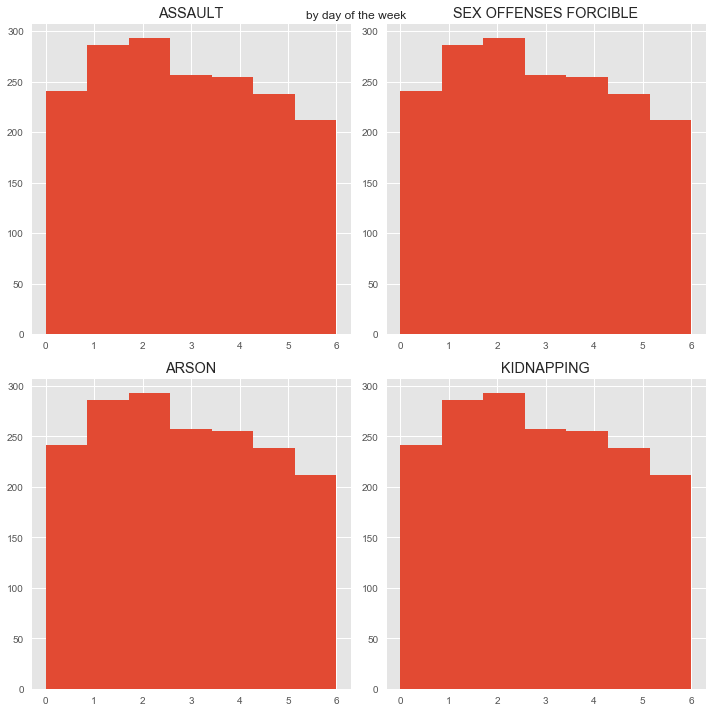

In [284]:
plot_by_day(violentCrimes, 2, 2)


In [285]:
theftBurglary = ['LARCENY/THEFT', 'VEHICLE THEFT', 'ROBBERY', 'BURGLARY', 'STOLEN PROPERTY', 'RECOVERED VEHICLE']

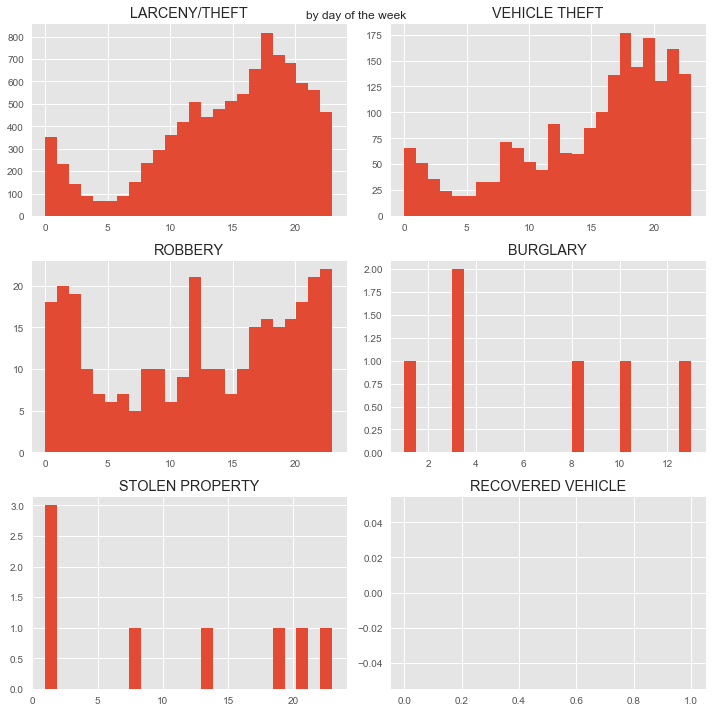

In [286]:
plot_by_hour(theftBurglary, 3, 2)

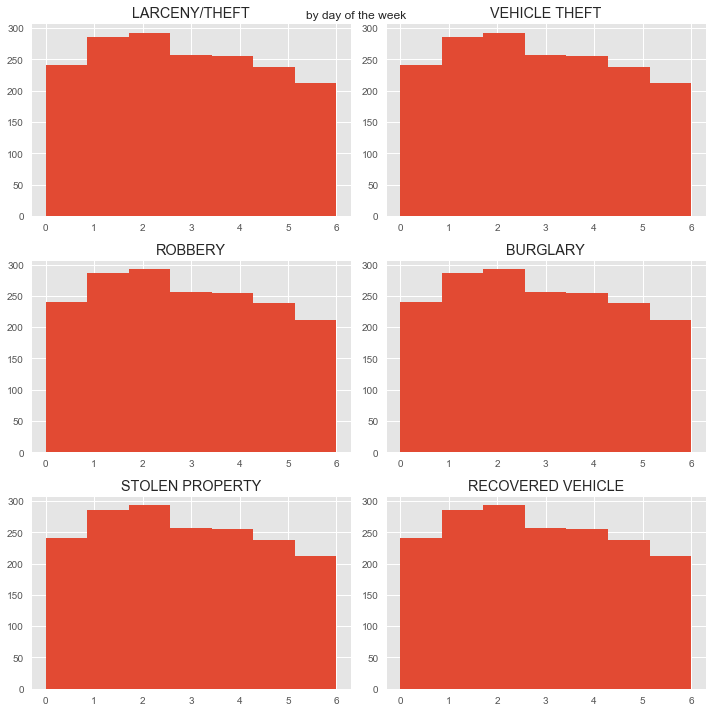

In [287]:
plot_by_day(theftBurglary, 3, 2)

In [288]:
economicCrimes = ['FORGERY/COUNTERFEITING', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT', 'BAD CHECKS', 'EXTORTION']

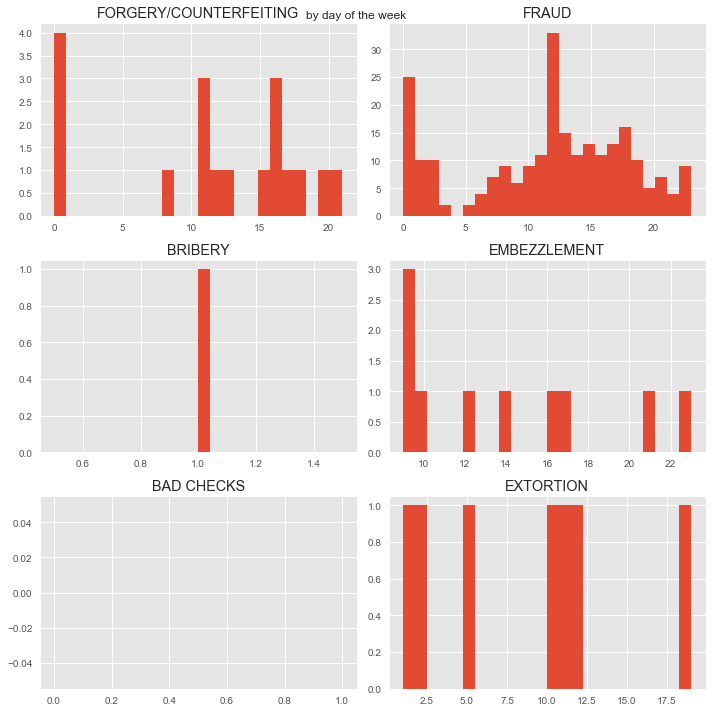

In [289]:
plot_by_hour(economicCrimes, 3, 2)

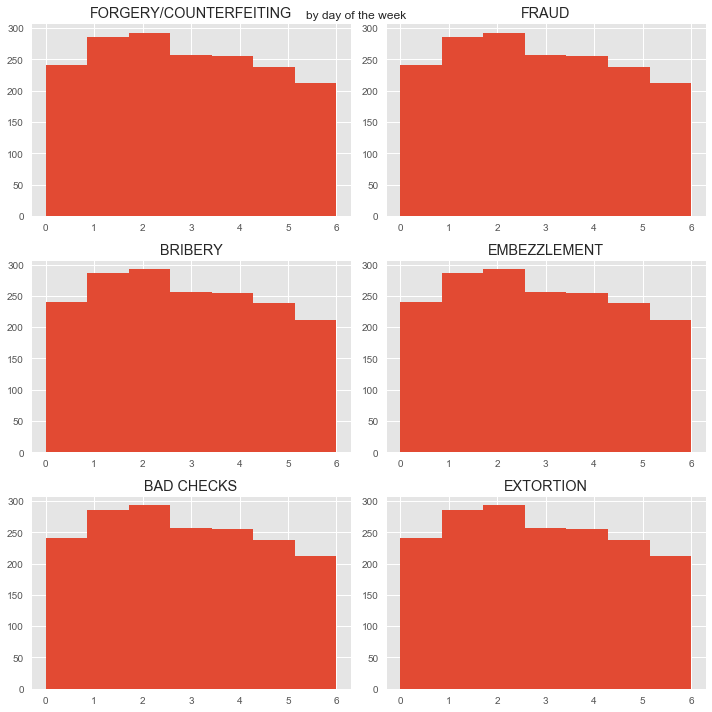

In [290]:
plot_by_day(economicCrimes, 3, 2)

In [291]:
publicDisorder = ['VANDALISM', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'TRESPASS', 'PROSTITUTION',
 'DISORDERLY CONDUCT', 'LOITERING', 'SEX OFFENSES NON FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT',
'TREA', 'GAMBLING']

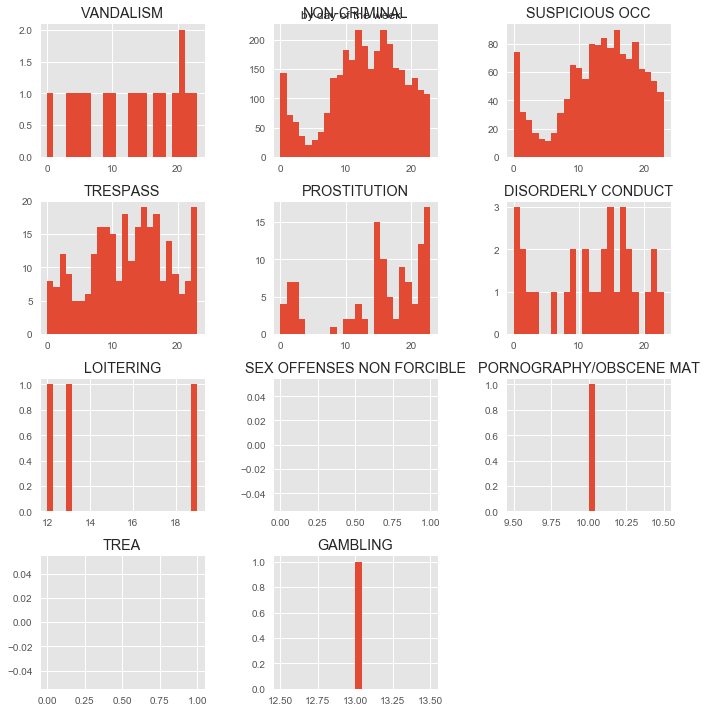

In [292]:
plot_by_hour(publicDisorder, 4, 3)

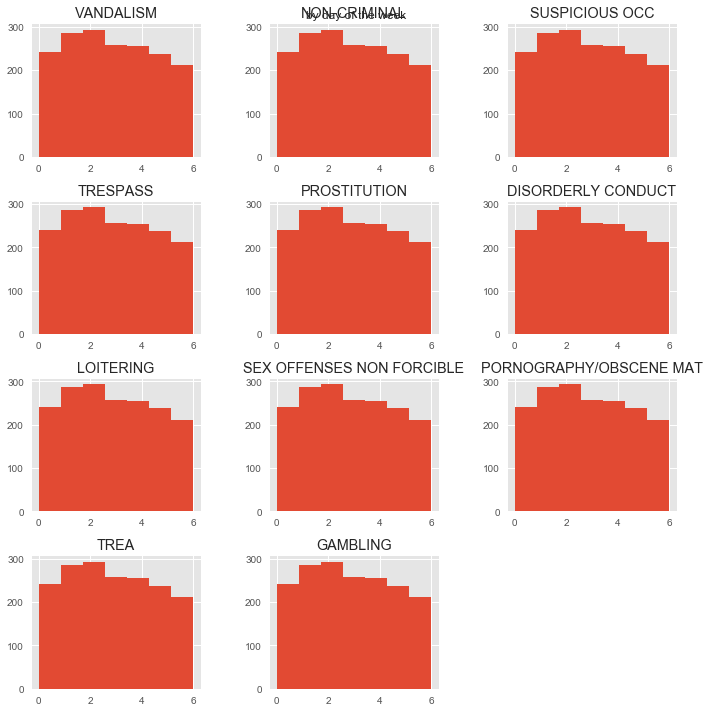

In [293]:
plot_by_day(publicDisorder, 4, 3)

In [294]:
drugsAlcohol = ['DRUNKENNESS', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS']

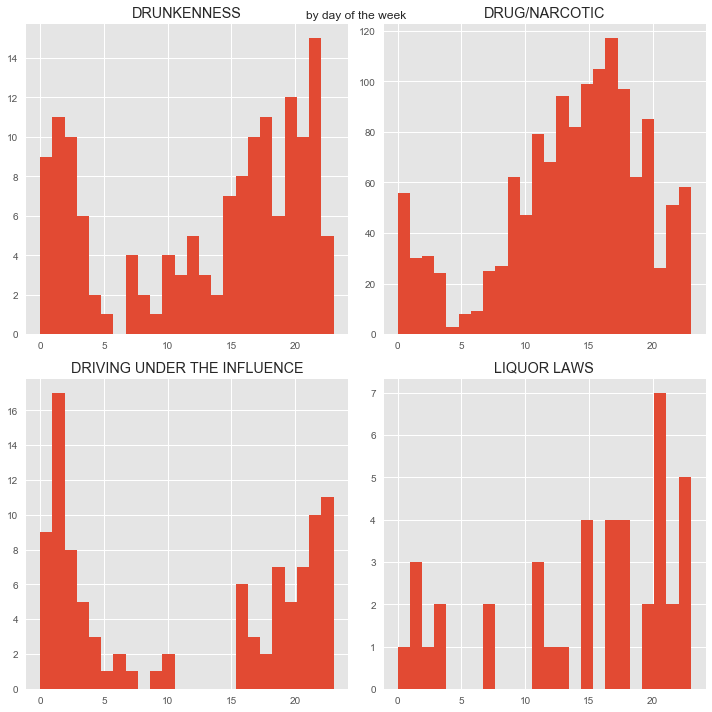

In [295]:
plot_by_hour(drugsAlcohol, 2, 2)

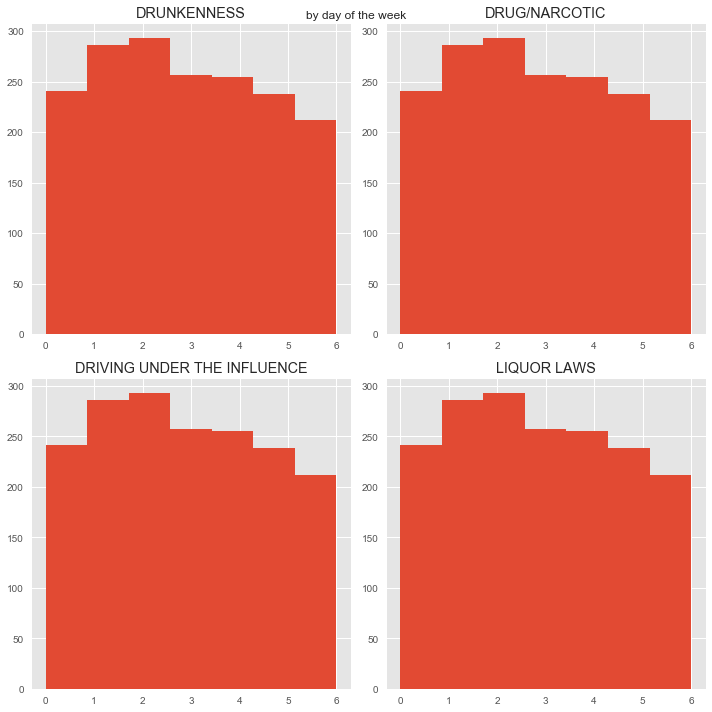

In [296]:
plot_by_day(drugsAlcohol, 2, 2)

In [392]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

In [399]:
monthsIdx = sf_data.groupby('Month').size().keys() 

In [397]:
monthsIdx

CategoricalIndex([6, 7, 8], categories=[6, 7, 8], ordered=False, name=u'Month', dtype='category')

In [400]:
monthsLit = ['June', 'July','August']

In [401]:
monthsLit

['June', 'July', 'August']

In [403]:
occursByMonth = sf_data.groupby('Month').size().get_values()

In [404]:
occursByMonth

array([ 9114,  9671, 10208])

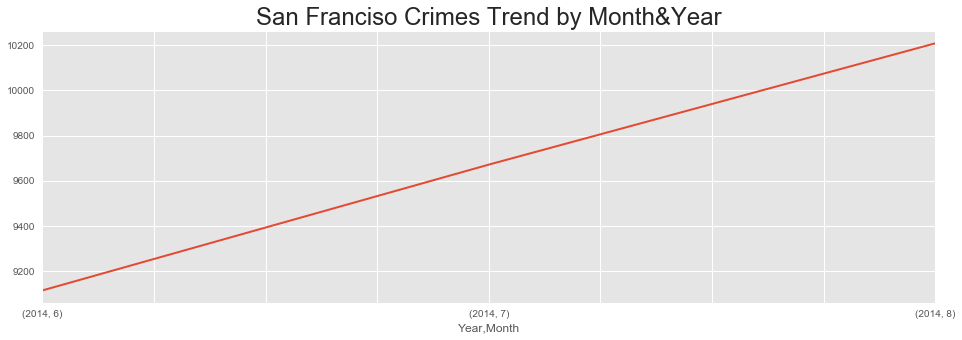

In [408]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = sf_data.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)

In [409]:
categories = {c:i for i,c in enumerate(sf_data['Category'])}

In [410]:
categories

{'ARSON': 28930,
 'ASSAULT': 28989,
 'BRIBERY': 11145,
 'BURGLARY': 28102,
 'DISORDERLY CONDUCT': 28934,
 'DRIVING UNDER THE INFLUENCE': 28689,
 'DRUG/NARCOTIC': 28954,
 'DRUNKENNESS': 28247,
 'EMBEZZLEMENT': 28789,
 'EXTORTION': 27205,
 'FAMILY OFFENSES': 26034,
 'FORGERY/COUNTERFEITING': 28113,
 'FRAUD': 28982,
 'GAMBLING': 6385,
 'KIDNAPPING': 28859,
 'LARCENY/THEFT': 28991,
 'LIQUOR LAWS': 28937,
 'LOITERING': 9108,
 'MISSING PERSON': 28912,
 'NON-CRIMINAL': 28992,
 'OTHER OFFENSES': 28985,
 'PORNOGRAPHY/OBSCENE MAT': 10747,
 'PROSTITUTION': 28945,
 'ROBBERY': 28942,
 'RUNAWAY': 28958,
 'SECONDARY CODES': 28923,
 'STOLEN PROPERTY': 25481,
 'SUICIDE': 28388,
 'SUSPICIOUS OCC': 28976,
 'TRESPASS': 28975,
 'VANDALISM': 27775,
 'VEHICLE THEFT': 28897,
 'WARRANTS': 28972,
 'WEAPON LAWS': 28893}

In [415]:
# Get general distances based on coordinates (not used yet)
sf_data['Distance'] = [np.linalg.norm((x,y)) for x,y in zip(sf_data.X, sf_data.Y)]
# Add numerical category column (not used yet)
sf_data['Category_Num'] = [categories[t] for t in sf_data.Category]
sf_data[:1]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Day,Year,Month,Hour,Week,FullDayOfWeek,FullMonthOfWeek,FullMonth,Distance,Category_Num
0,140734311,ARSON,ARSON OF A VEHICLE,6,2014-08-31,2017-08-22 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,...,31,2014,8,23,35,Sunday,August,August,128.091075,28930


In [416]:
from matplotlib.colors import LogNorm
# Plot 2D histogram of data with constraint
# Default constraint is category, which has 36 unique values (i.e. 12x3)
def plot_data(constraint='Category', rownum=12, colnum=3):
    _, ax = plt.subplots(nrows=rownum, ncols=colnum,figsize=(10,30))
    i = 0
    j = 0
    for cat in sf_data[constraint].unique():
        cat_sub = sf_data[sf_data[constraint] == cat]
        try:
            ax[j][i].hist2d(cat_sub.X, cat_sub.Y, bins=60, norm=LogNorm(), cmap=plt.cm.jet)
            ax[j][i].set_title('{0} {1}'.format(cat, len(cat_sub)))
        except(KeyError, IndexError):
            pass
        i+=1
        if i > colnum-1:
            i = 0
            j+=1
    plt.tight_layout()
    plt.show()

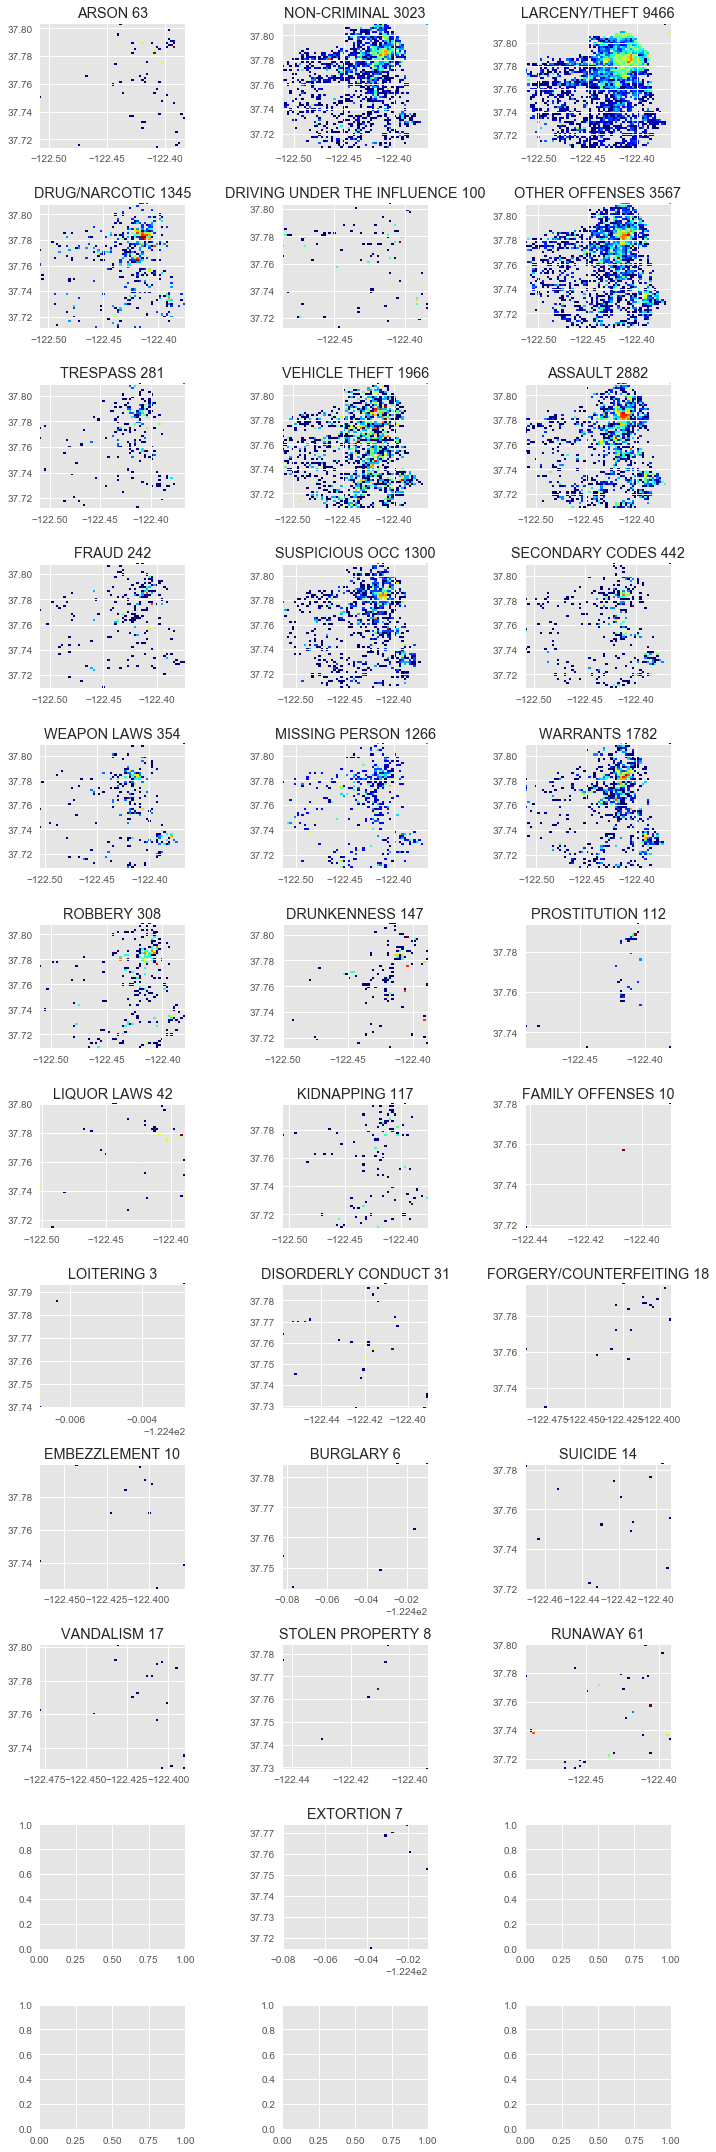

In [417]:
plot_data()

In [709]:
map_categories = {
'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
'ANIMAL COMPLAINT': 'OTHER OFFENSES',
'ANIMAL-OTH': 'OTHER OFFENSES',
'ANIMAL-BITE': 'OTHER OFFENSES',
'ANIMAL-CRUELTY': 'OTHER OFFENSES', 
'ARSON': 'PROPERTY',
'ASSLT-NONAGG': 'PERSONAL',
'ASSLT-AGG-POLICE-GUN': 'PERSONAL',
'ASSLT-AGG-WEAPON': 'PERSONAL',
'ASSLT-AGG-BODYFORCE': 'PERSONAL',
'ASSLT-NONAGG-POLICE': 'PERSONAL',
'ASSLT-AGG-GUN': 'PERSONAL',
'ASSLT-AGG-POLICE-WEAPON': 'PERSONAL',
'ASSLT-AGG-POLICE-BODYFORCE': 'PERSONAL',  
'ASSAULT': 'PERSONAL',
'BIAS INCIDENT': 'INCHOATE',
'BIKE THEFT': 'PROPERTY',
'BRIBERY': 'PROPERTY',
'BURGLARY': 'PROPERTY',
'BURGLARY-SECURE PARKING-RES': 'PROPERTY',
'BURGLARY-FORCE-RES' : 'PROPERTY',
'BURGLARY-NOFORCE-RES': 'PROPERTY',
'BURGLARY-FORCE-NONRES': 'PROPERTY',
'BURGLARY-NOFORCE-NONRES': 'PROPERTY',
'BURGLARY-SECURE PARKING-NONRES':'PROPERTY',
'CAR PROWL': 'INCHOATE',
'COUNTERFEIT': 'PROPERTY',
'DISORDERLY CONDUCT': 'INCHOATE',
'DISPUTE': 'INCHOATE',
'DISPUTE-CIVIL PROPERTY (AUTO)': 'INCHOATE',
'DISPUTE-OTH': 'INCHOATE',
'DISPUTE-CIVIL PROPERTY (NON AU': 'INCHOATE',
'DISTURBANCE': 'INCHOATE',
'DISTURBANCE-OTH': 'INCHOATE',
'DISTURBANCE-NOISE': 'INCHOATE',
'DRIVING UNDER THE INFLUENCE': 'STATUTORY',
'DRIVE-BY': 'STATUTORY',
'DRUG/NARCOTIC': 'STATUTORY',
'DRUNKENNESS': 'STATUTORY',
'DUI': 'STATUTORY',
'DUI-DRUGS': 'STATUTORY',
'DUI-LIQUOR': 'STATUTORY',
'ELUDING': 'INCHOATE',
'ELUDING-FELONY FLIGHT': 'INCHOATE',
'EMBEZZLE': 'PROPERTY',
'EMBEZZLEMENT': 'PROPERTY',
'ENDANGERMENT':'INCHOATE',
'ESCAPE': 'STATUTORY',
'EXTORTION': 'INCHOATE',
'FALSE REPORT': 'INCHOATE',
'FAMILY OFFENSES': 'INCHOATE',
'FIREWORK': 'PROPERTY',
'FIREWORK-USE' : 'PROPERTY',
'FIREWORK-POSSESS': 'PROPERTY',
'FORGERY': 'PROPERTY',
'FORGERY/COUNTERFEITING': 'PROPERTY',
'FORGERY-CHECK': 'PROPERTY',
'FORGERY-OTH': 'PROPERTY',
'FORGERY-CREDIT CARD': 'PROPERTY',   
'FRAUD': 'PROPERTY',
'FRAUD-CHECK': 'PROPERTY',
'FRAUD-IDENTITY THEFT': 'PROPERTY',
'FRAUD-CREDIT CARD': 'PROPERTY',
'FRAUD-OTHER': 'PROPERTY',
'FRAUD-COMPUTER': 'PROPERTY',
'FRAUD-WIRE-ELECTRONIC': 'PROPERTY',
'GAMBLING': 'PROPERTY',
'HARASSMENT': 'PERSONAL',
'HOMICIDE': 'PERSONAL',
'HOMICIDE-JUST-WEAPON': 'PERSONAL',
'HOMICIDE-JUST-GUN': 'PERSONAL',
'HOMICIDE-PREMEDITATED-GUN' : 'PERSONAL',  
'ILLEGAL DUMPING': 'STATUTORY',
'INJURY': 'PERSONAL',
'INJURY - ACCIDENTAL': 'PERSONAL',
'INJURY - OTHER': 'PERSONAL',
'KIDNAPPING': 'PERSONAL',
'LARCENY/THEFT': 'PROPERTY',
'LIQUOR LAWS': 'STATUTORY',
'LIQUOR VIOLATION': 'STATUTORY',
'LIQUOR LAW VIOLATION': 'STATUTORY',
'LOITERING': 'INCHOATE',
'LOST PROPERTY': 'PROPERTY',
'MAIL THEFT': 'PROPERTY',
'MISSING PERSON': 'PERSONAL',
'MALICIOUS HARASSMENT':'PERSONAL',
'NARCOTICS': 'STATUTORY',
'NARC-FOUND-OTHER': 'STATUTORY',
'NARC-POSSESS-HALLUCINOGEN': 'STATUTORY',
'NARC-POSSESS-METH': 'STATUTORY',
'NARC-FOUND-MARIJU': 'STATUTORY',
'NARC-POSSESS-COCAINE': 'STATUTORY',
'NARC-EQUIPMENT/PARAPHENALIA': 'STATUTORY',
'NARC-POSSESS-AMPHETAMINE': 'STATUTORY',
'NARC-SELL-HEROIN': 'STATUTORY',
'NARC-POSSESS-HEROIN': 'STATUTORY',
'NARC-SELL-COCAINE': 'STATUTORY',
'NARC-FOUND-AMPHETAMINE': 'STATUTORY',
'NARC-FOUND-HEROIN': 'STATUTORY',
'NARC-POSSESS-OTHER': 'STATUTORY',
'NARC-SELL-METH': 'STATUTORY',
'NARC-FOUND-SYNTHETIC': 'STATUTORY',
'NARC-POSSESS-MARIJU': 'STATUTORY',
'NARC-FOUND-COCAINE': 'STATUTORY', 
'NARC-FORGERY-PRESCRIPTION' : 'STATUTORY', 
'NARC-SELL-AMPHETAMINE': 'STATUTORY', 
'NARC-DRUG TRAFFIC LOITERING': 'STATUTORY', 
'NARC-FOUND-OPIUM': 'STATUTORY', 
'NARC-POSSESS-PILL/TABLET': 'STATUTORY',
'NARC-FOUND-METH': 'STATUTORY',
'NARC-FRAUD-PRESCRIPTION':'STATUTORY',
'NARC-SMUGGLE-OTHER':'STATUTORY',
'NARC-SELL-SYNTHETIC':'STATUTORY', 
'NARC-SELL-MARIJU':'STATUTORY', 
'NARC-PRODUCE-MARIJU' :'STATUTORY',  
'NON-CRIMINAL': 'NON-CRIMINAL',
'OBSTRUCT': 'PROPERTY',
'OTHER OFFENSES': 'OTHER OFFENSES',
'OTHER PROPERTY': 'PROPERTY',
'PICKPOCKET': 'PROPERTY',
'PORNOGRAPHY': 'INCHOATE',
'PORNOGRAPHY/OBSCENE MAT': 'INCHOATE',
'PORNOGRAPHY-OBSCENE MATERIAL' : 'INCHOATE', 
'PROPERTY DAMAGE': 'PROPERTY',
'PROPERTY DAMAGE-RESIDENTIAL': 'PROPERTY',
'PROPERTY DAMAGE-NON RESIDENTIA': 'PROPERTY',
'PROPERTY FOUND': 'PROPERTY',
'PROPERTY DAMAGE - GRAFFITI': 'PROPERTY',
'PROPERTY STOLEN-POSSESS': 'PROPERTY',
'PROPERTY LOST': 'PROPERTY',
'PROPERTY LOST - POLICE EQUIPME':'PROPERTY',
'PROPERTY STOLEN-TRAFFICKING' :'PROPERTY',  
'PROP RECOVERED-OTHER AGENCY': 'PROPERTY',
'PROPERTY STOLEN-SELL': 'PROPERTY',
'PROSTITUTION': 'INCHOATE',
'PROSTITUTION PATRONIZING': 'INCHOATE',
'PROSTITUTION LOITERING' : 'INCHOATE', 
'PROSTITUTION-ASSIST-PROMOTE': 'INCHOATE',
'PUBLIC NUISANCE': 'INCHOATE',
'PURSE SNATCH': 'PROPERTY',
'RECKLESS BURNING': 'PROPERTY',
'RECOVERED PROPERTY': 'PROPERTY',
'ROBBERY': 'PROPERTY',
'ROBBERY-STREET-BODYFORCE': 'PROPERTY',
'ROBBERY-BUSINESS-BODYFORCE': 'PROPERTY',
'ROBBERY-BANK-WEAPON':'PROPERTY',
'ROBBERY-BUSINESS-WEAPON':'PROPERTY',
'ROBBERY-STREET-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-BODYFORCE':'PROPERTY',
'ROBBERY-STREET-WEAPON':'PROPERTY',
'ROBBERY-BUSINESS-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-WEAPON':'PROPERTY',
'ROBBERY-BANK-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-GUN':'PROPERTY',
'ROBBERY-BANK-BODYFORCE':'PROPERTY',
'RUNAWAY': 'INCHOATE',
'SECONDARY CODES': 'STATUTORY',
'SHOPLIFTING': 'PROPERTY',
'STOLEN PROPERTY': 'PROPERTY',
'SUICIDE': 'PERSONAL',
'SUSPICIOUS OCC': 'PROPERTY',
'THEFT OF SERVICES': 'PROPERTY',
'THEFT-BICYCLE': 'PROPERTY',
'THEFT-BUILDING': 'PROPERTY',
'THEFT-CARPROWL': 'PROPERTY',
'THEFT-SHOPLIFT':'PROPERTY',
'THEFT-OTH': 'PROPERTY',
'THEFT-PKPOCKET': 'PROPERTY',
'THEFT-LICENSE PLATE': 'PROPERTY',
'THEFT-AUTOACC': 'PROPERTY',
'THEFT-MAIL': 'PROPERTY',
'THEFT-PRSNATCH' : 'PROPERTY',  
'THEFT-AUTO PARTS': 'PROPERTY',
'THEFT-COINOP': 'PROPERTY',
'THEFT-BOAT': 'PROPERTY',
'THREATS': 'INCHOATE',
'THREATS-OTHER' : 'INCHOATE', 
'THREATS-KILL': 'INCHOATE',
'THREATS-WEAPON': 'INCHOATE',
'TRAFFIC': 'STATUTORY',
'TRESPASS': 'INCHOATE',
'URINATING/DEFECATING-IN PUBLIC':'INCHOATE',  
'VANDALISM': 'PROPERTY',
'VEH-THEFT-MTRCYCLE': 'PROPERTY',
'VEHICLE THEFT': 'PROPERTY',
'VEH-THEFT-AUTO': 'PROPERTY',
'VEH-THEFT-TRUCK': 'PROPERTY',
'VEH-THEFT-OTHVEH': 'PROPERTY',
'VEH-RCVD-FOR OTHER AGENCY': 'PROPERTY',
'VEH-THEFT-TRAILER': 'PROPERTY',
'VIOLATION OF COURT ORDER': 'STATUTORY',
'VIOL-COURT ORDER': 'STATUTORY',
'WARRANT ARREST': 'STATUTORY',
'WARRANTS': 'STATUTORY',
'WARRANT-FUGITIVE': 'STATUTORY',
'WARRARR-MISDEMEANOR': 'STATUTORY',
'WARRARR-FELONY': 'STATUTORY',
'WEAPON': 'STATUTORY',
'WEAPON-CONCEALED': 'STATUTORY',
'WEAPON-SELLING':'STATUTORY',
'WEAPON LAWS': 'STATUTORY',
'WEAPON-POSSESSION':'STATUTORY',
'WEAPON-UNLAWFUL USE':'STATUTORY',
'WEAPON-SURRENDER-EXCLUDING FIR' : 'STATUTORY',
'WEAPON-DISCHARGE':'STATUTORY'
}


In [419]:
seattle_data.head(5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Category,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Location,Month,Year,Time,Day,DayOfWeek,Date,Hour,Week,FullDayOfWeek
1189,187268,2014290303,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2014-08-30 23:54:00,2014-08-30 23:54:00,NaT,...,"(47.532092019, -122.272656357)",8,2014,23:54:00,30,5,2014-08-30,23,35,Saturday
1190,1088511,2014290303,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2014-08-30 23:54:00,2014-08-30 23:54:00,NaT,...,"(47.532092019, -122.272656357)",8,2014,23:54:00,30,5,2014-08-30,23,35,Saturday
1191,1049460,2014290297,5707,0,TRESPASS,5700,TRESPASS,2014-08-30 23:46:00,2014-08-30 23:46:00,NaT,...,"(0.0, 0.0)",8,2014,23:46:00,30,5,2014-08-30,23,35,Saturday
1192,37072,2014290297,5707,0,TRESPASS,5700,TRESPASS,2014-08-30 23:46:00,2014-08-30 23:46:00,NaT,...,"(47.670551698, -122.387587339)",8,2014,23:46:00,30,5,2014-08-30,23,35,Saturday
1193,1050036,2014906962,2305,0,THEFT-CARPROWL,2300,CAR PROWL,2014-08-30 23:39:00,2014-08-30 18:00:00,2014-08-30 18:35:00,...,"(0.0, 0.0)",8,2014,23:39:00,30,5,2014-08-30,23,35,Saturday


In [420]:
sf_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Day,Year,Month,Hour,Week,FullDayOfWeek,FullMonthOfWeek,FullMonth,Distance,Category_Num
0,140734311,ARSON,ARSON OF A VEHICLE,6,2014-08-31,2017-08-22 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,...,31,2014,8,23,35,Sunday,August,August,128.091075,28930
1,140736317,NON-CRIMINAL,LOST PROPERTY,6,2014-08-31,2017-08-22 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,...,31,2014,8,23,35,Sunday,August,August,128.126045,28992
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-22 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,...,31,2014,8,23,35,Sunday,August,August,128.107334,28991
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-22 23:30:00,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,...,31,2014,8,23,35,Sunday,August,August,128.177232,28991
4,140734220,NON-CRIMINAL,FOUND PROPERTY,6,2014-08-31,2017-08-22 23:23:00,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,...,31,2014,8,23,35,Sunday,August,August,128.200710,28992


In [711]:
# Map the incident codes to a smaller set
seattle_data['incident_category'] = seattle_data['Offense Type'].apply(lambda col: map_categories[col])
sf_data['incident_category'] = sf_data['Category'].apply(lambda col: map_categories[col])

In [712]:
seattle_data['incident_category']

1189           PROPERTY
1190           PROPERTY
1191           INCHOATE
1192           INCHOATE
1193           PROPERTY
1194           PROPERTY
1195           INCHOATE
1196           INCHOATE
1197           PROPERTY
1198           PROPERTY
1199           PERSONAL
1200           PROPERTY
1201           PROPERTY
1202           PROPERTY
1203           INCHOATE
1204           INCHOATE
1205           PROPERTY
1206           PROPERTY
1207           INCHOATE
1208           INCHOATE
1209           PROPERTY
1210           PROPERTY
1211           PROPERTY
1212           PROPERTY
1213           PROPERTY
1214           PROPERTY
1215           PERSONAL
1216           PERSONAL
1217           PERSONAL
1218           PERSONAL
              ...      
32749          PROPERTY
32750          PROPERTY
32751          INCHOATE
32752          INCHOATE
32753          PROPERTY
32754          PROPERTY
32755          PROPERTY
32756          PROPERTY
32757          PROPERTY
32758          PROPERTY
32759          P

In [713]:
sf_data['incident_category']

0              PROPERTY
1          NON-CRIMINAL
2              PROPERTY
3              PROPERTY
4          NON-CRIMINAL
5             STATUTORY
6             STATUTORY
7             STATUTORY
8        OTHER OFFENSES
9              INCHOATE
10             PROPERTY
11             PROPERTY
12         NON-CRIMINAL
13             PROPERTY
14             PROPERTY
15             PERSONAL
16             PROPERTY
17             PERSONAL
18             PROPERTY
19         NON-CRIMINAL
20            STATUTORY
21             PERSONAL
22             PROPERTY
23             PROPERTY
24             PROPERTY
25       OTHER OFFENSES
26             PERSONAL
27            STATUTORY
28       OTHER OFFENSES
29             PROPERTY
              ...      
28963      NON-CRIMINAL
28964          PROPERTY
28965      NON-CRIMINAL
28966          PROPERTY
28967          PROPERTY
28968          PROPERTY
28969          PROPERTY
28970          PROPERTY
28971         STATUTORY
28972         STATUTORY
28973    OTHER O

In [715]:
seattle_data.head(5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Category,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Month,Year,Time,Day,DayOfWeek,Date,Hour,Week,FullDayOfWeek,incident_category
1189,187268,2014290303,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2014-08-30 23:54:00,2014-08-30 23:54:00,NaT,...,8,2014,23:54:00,30,5,2014-08-30,23,35,Saturday,PROPERTY
1190,1088511,2014290303,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2014-08-30 23:54:00,2014-08-30 23:54:00,NaT,...,8,2014,23:54:00,30,5,2014-08-30,23,35,Saturday,PROPERTY
1191,1049460,2014290297,5707,0,TRESPASS,5700,TRESPASS,2014-08-30 23:46:00,2014-08-30 23:46:00,NaT,...,8,2014,23:46:00,30,5,2014-08-30,23,35,Saturday,INCHOATE
1192,37072,2014290297,5707,0,TRESPASS,5700,TRESPASS,2014-08-30 23:46:00,2014-08-30 23:46:00,NaT,...,8,2014,23:46:00,30,5,2014-08-30,23,35,Saturday,INCHOATE
1193,1050036,2014906962,2305,0,THEFT-CARPROWL,2300,CAR PROWL,2014-08-30 23:39:00,2014-08-30 18:00:00,2014-08-30 18:35:00,...,8,2014,23:39:00,30,5,2014-08-30,23,35,Saturday,PROPERTY


# Incident trend by category

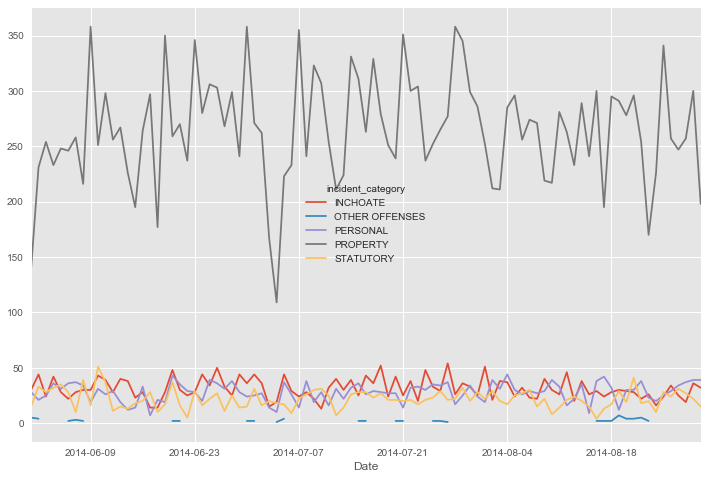

In [756]:
by_date = seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            index='Date',
                            columns='incident_category' )
ax = by_date.plot(figsize=(12,8))
#ax.figure.savefig('seattle_incidents_by_date.png', bbox_inches='tight')

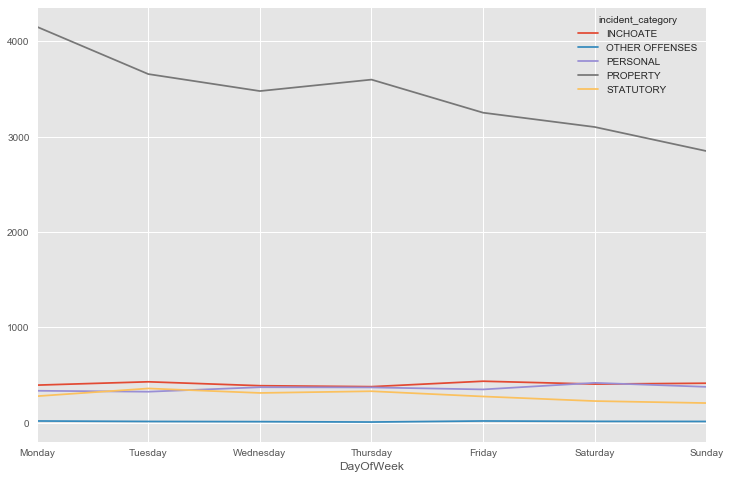

In [719]:
by_weekday = seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            index='DayOfWeek',
                            columns='incident_category')   
ax = by_weekday.plot(figsize=(12,8))
ax.set_xticklabels(daysOfWeekLit)
ax.figure.savefig('incidents_by_weekday.png', bbox_inches='tight')

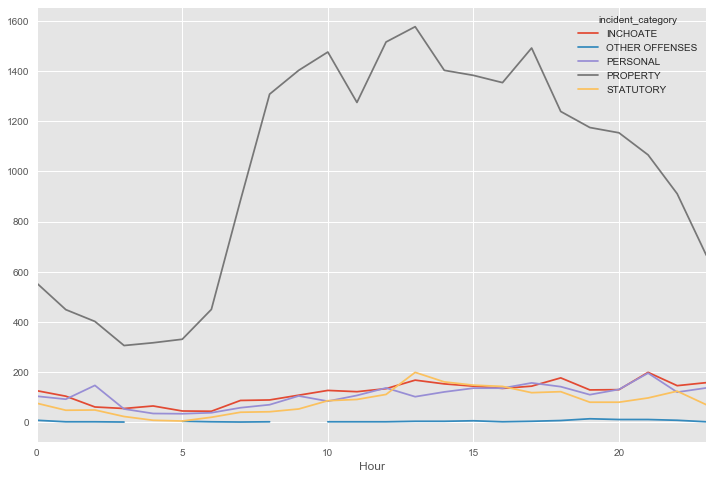

In [720]:
by_hour = seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            index='Hour',
                            columns='incident_category')   
ax = by_hour.plot(figsize=(12,8))
ax.figure.savefig('incidents_by_hour.png', bbox_inches='tight')

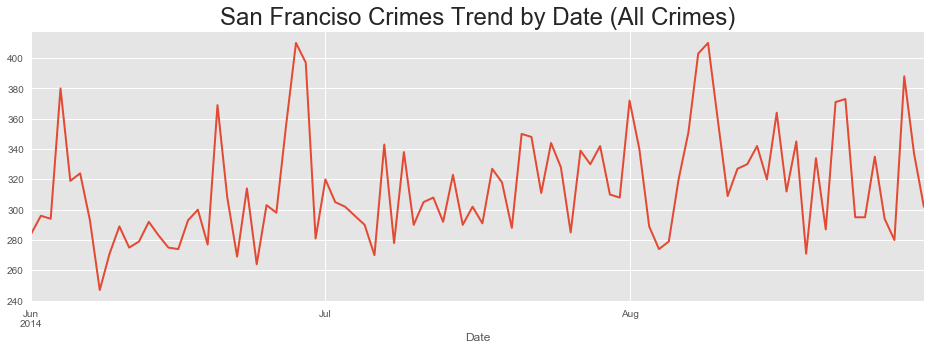

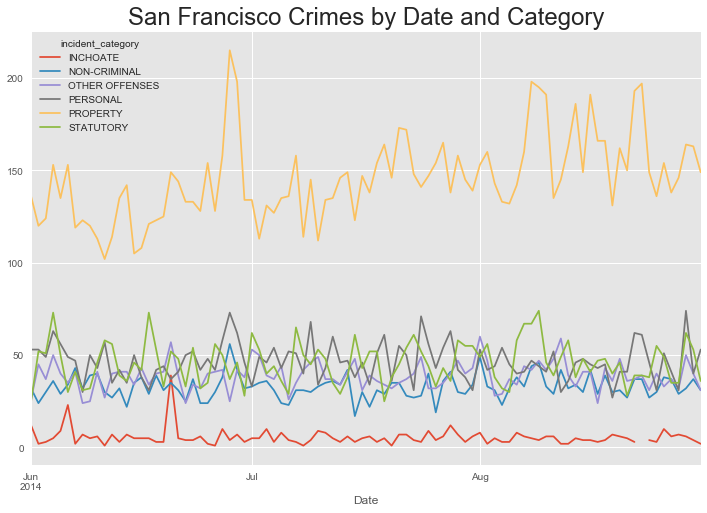

In [738]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = sf_data.groupby('Date').size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Date (All Crimes)', fontsize=24)



by_date = sf_data.pivot_table('IncidntNum', aggfunc='count',
                            index='Date',
                            columns='incident_category' )
ax = by_date.plot(figsize=(12,8))
ax.set_title("San Francisco Crimes by Date and Category",fontsize=24)
ax.figure.savefig('sanfran_incidents_by_date.png', bbox_inches='tight')

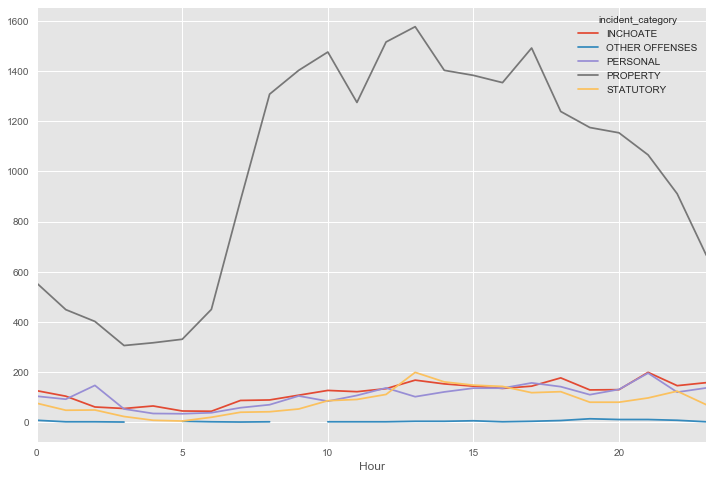

In [757]:
by_hour = seattle_data.pivot_table('General Offense Number', aggfunc='count',
                            index='Hour',
                            columns='incident_category')   
ax = by_hour.plot(figsize=(12,8))
ax.figure.savefig('incidents_by_month.png', bbox_inches='tight')

In [741]:
def plot_top10():
    top10_seattle = pd.DataFrame({'Counts':seattle_data.Category.value_counts()[:10]})
    top10_seattle['Category'] = top10_seattle.index
    top10_sf = pd.DataFrame({'Counts':sf_data.Category.value_counts()[:10]})
    top10_sf['Category'] = top10_sf.index
    fig = plt.figure()
    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1)
    plt.bar(np.arange(10), top10_seattle.Counts)
    plt.xticks(np.arange(10), top10_seattle.index, rotation=45)
    plt.ylim(0, 10000)
    plt.ylabel('Counts')
    plt.title('Top 10 Crime Counts for Seattle - Summer of 2014')
    
    
    plt.subplot(2,1,2)
    plt.bar(np.arange(10), top10_sf.Counts)
    plt.xticks(np.arange(10), top10_sf.index, rotation=45)
    plt.ylabel('Counts')
    plt.title('Top 10 Crime Counts for San Francisco - Summer of 2014')
    plt.tight_layout()

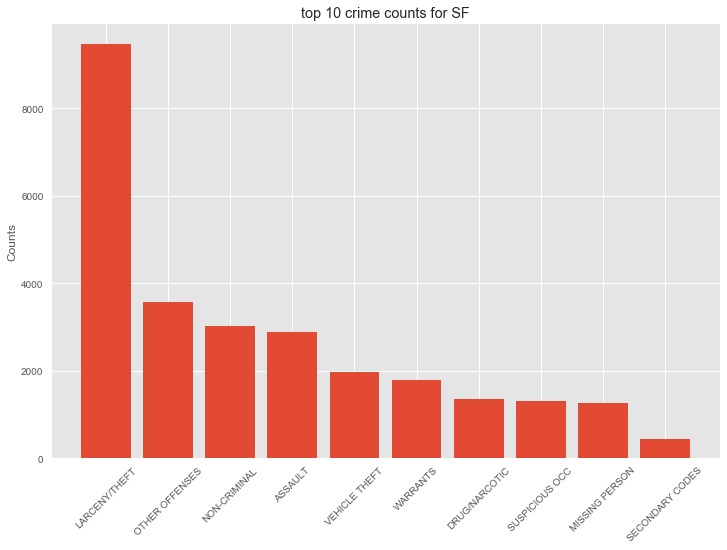

In [752]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(10),top10_sf.Counts)
plt.xticks(np.arange(10),top10_sf.index,rotation=45)
plt.ylabel('Counts')
plt.title('top 10 crime counts for SF')



In [748]:
top10_sf=pd.DataFrame({'Counts':sf_data.Category.value_counts()[:10]})

In [749]:
top10_sf

,Counts
LARCENY/THEFT,9466
OTHER OFFENSES,3567
NON-CRIMINAL,3023
ASSAULT,2882
VEHICLE THEFT,1966
WARRANTS,1782
DRUG/NARCOTIC,1345
SUSPICIOUS OCC,1300
MISSING PERSON,1266
SECONDARY CODES,442


In [750]:
top10_sf['Category'] = top10_sf.index

In [751]:
top10_sf['Category']

LARCENY/THEFT        LARCENY/THEFT
OTHER OFFENSES      OTHER OFFENSES
NON-CRIMINAL          NON-CRIMINAL
ASSAULT                    ASSAULT
VEHICLE THEFT        VEHICLE THEFT
WARRANTS                  WARRANTS
DRUG/NARCOTIC        DRUG/NARCOTIC
SUSPICIOUS OCC      SUSPICIOUS OCC
MISSING PERSON      MISSING PERSON
SECONDARY CODES    SECONDARY CODES
Name: Category, dtype: object

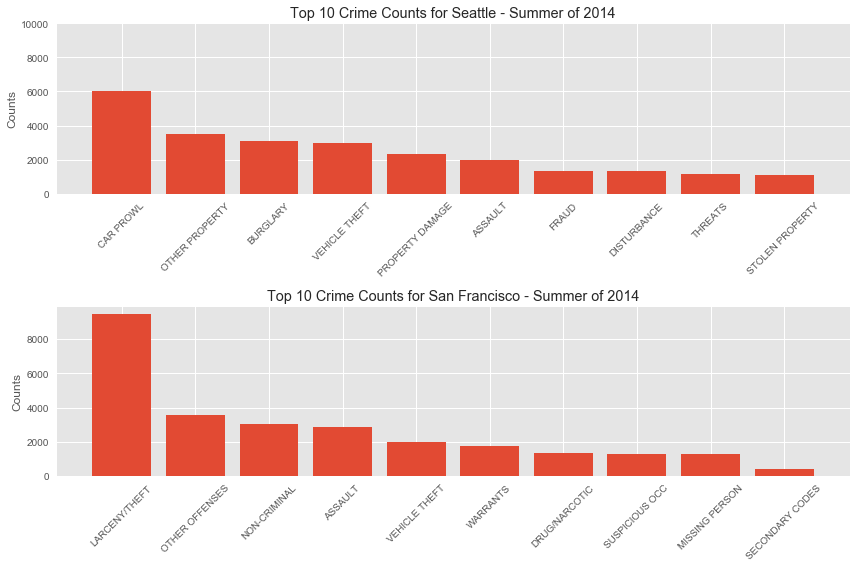

In [742]:
plot_top10()

In [744]:
def plot_hourly_crime(data, crime): # Subset out the passed in crime.
              subset_data = data[data['Category'] == crime]
              # Group by Hour and Day of the Week.
              hourly_subset = subset_data.groupby(['FullDayOfWeek', 'Hour'], as_index=True).count().reset_index()
# Oddly, one data set coerced datatypes, while the other retained 'category' type status. # Explicitly, change data types before filling in any missing values hourly_subset['Hour'] = hourly_subset['Hour'].astype('int64')
              hourly_subset['Category'] = hourly_subset['Category'].astype('float64') 
              hourly_subset['FullDayOfWeek'] = hourly_subset['FullDayOfWeek'].astype('object')
              # Fill in NaN's with 0 if there are any that came up counting over sub-groups
              hourly_subset = hourly_subset[['Hour', 'Category', 'FullDayOfWeek']].fillna(0)
              hourly_subset = hourly_subset.rename(columns={'Category': 'Count'})
              # Get the averages of the hourly data.
              avg_hourly = hourly_subset.groupby(['Hour'], as_index=False).mean()
              avg_hourly['FullDayOfWeek'] = 'Average'
              # Add in Averages as their own entry
              full_hourly = pd.concat([hourly_subset, avg_hourly], axis=0)
              # Specify the order of days to be plotted
              day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday']
              col_order = ['Average'] + day_names
              # Reformat the time for the plot
              time_labels = ['%02d:00' % x for x in np.arange(24)]
              # Plot the crime
              grid = sns.factorplot(data=full_hourly,
                                    x='Hour', y='Count',
                                    hue='FullDayOfWeek',
                                    col='FullDayOfWeek',
                                    col_wrap=4,
                                    col_order=col_order,
                                    size=5, palette='Set2')
              # Add labels/rotate x-axis
              grid.set_xticklabels(labels=time_labels, rotation=90)
              grid.set(ylim=(0, None)) # Start y-axis at 0, no neg. crime counts plt.subplots_adjust(top=0.93) # Make room for main title
              grid.fig.suptitle('{} Counts for Each Day of the Week Per Hour (Avg. included)'.format(crime.title()),size=15)
 

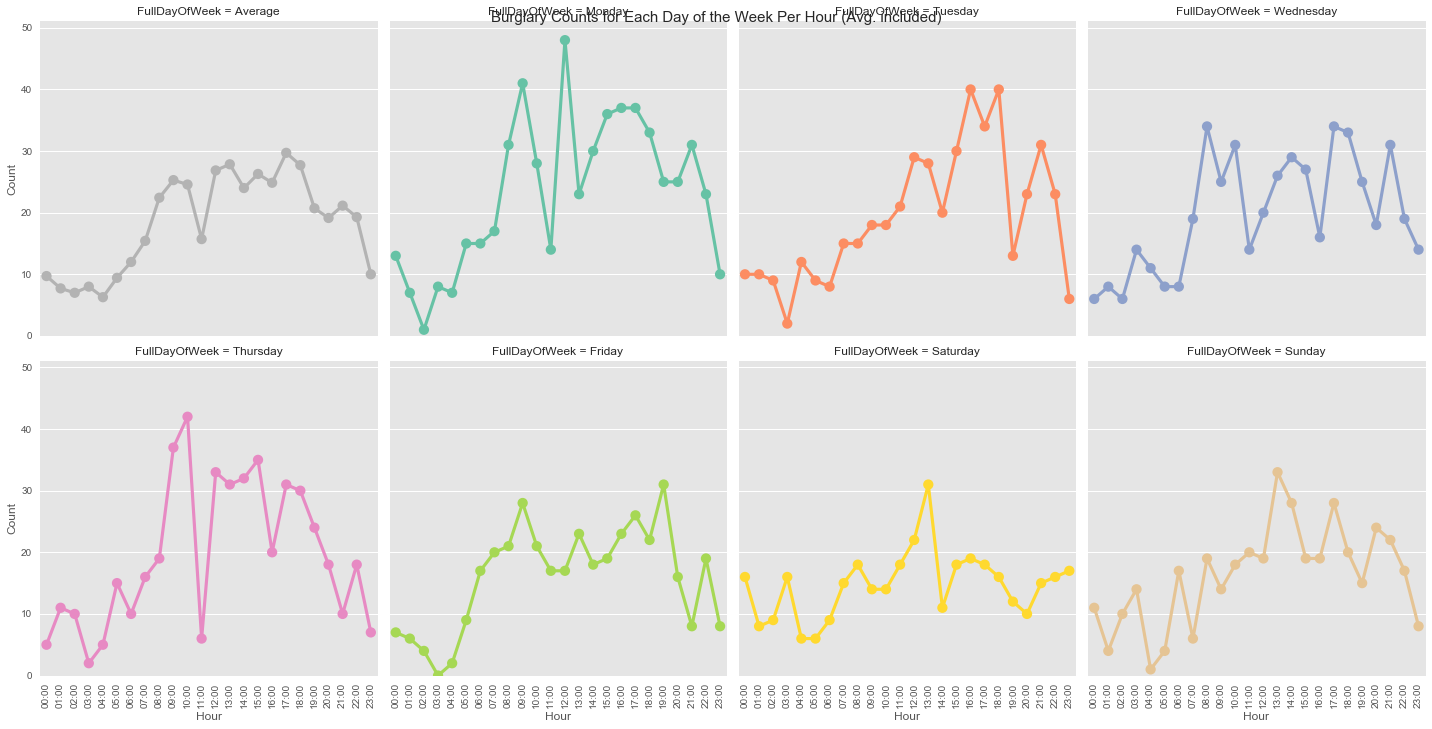

In [745]:
plot_hourly_crime(seattle_data, 'BURGLARY')

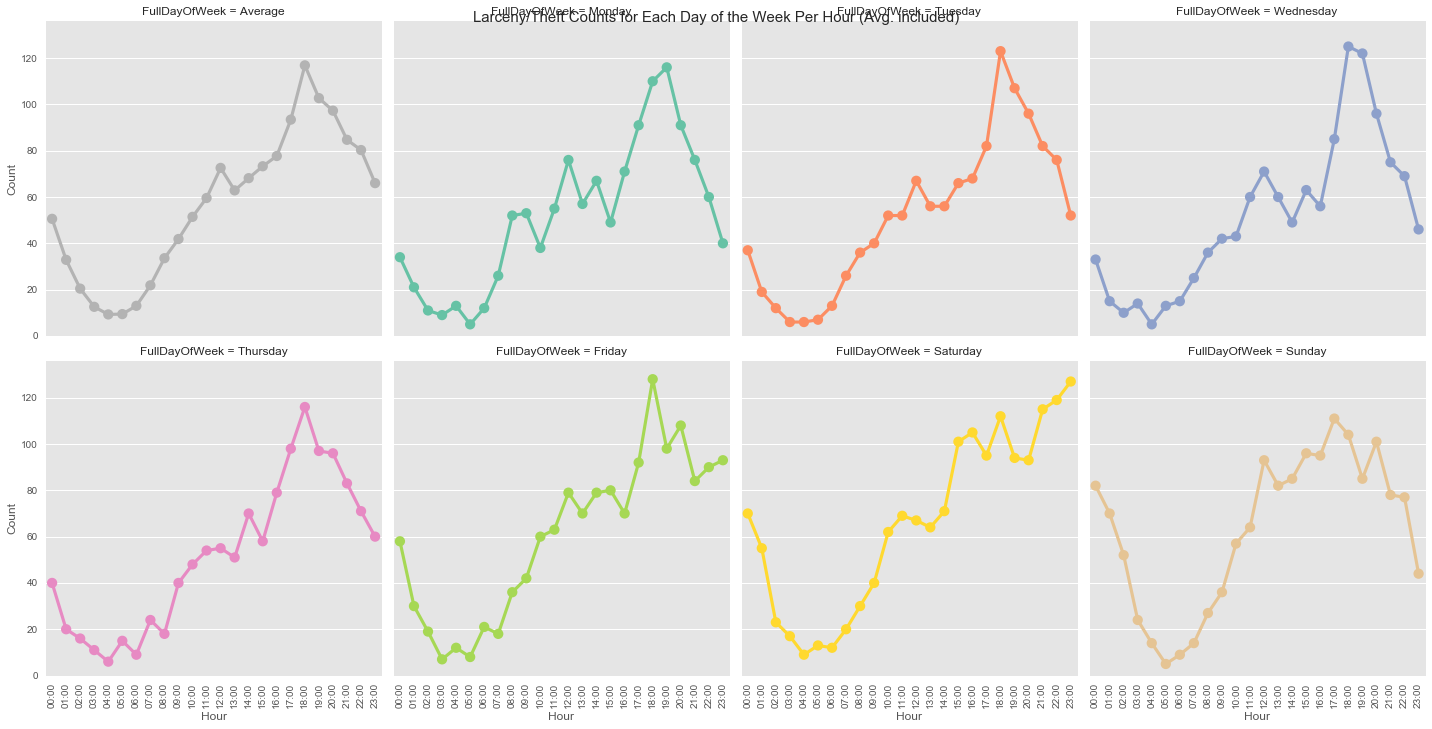

In [746]:
plot_hourly_crime(sf_data, 'LARCENY/THEFT')